# Analyzing crime data in DC: do crime density patterns relate to income inequality?

## Ilgi Toprak

### Research Question

`Research Question`

This research project will look into possible correlations between crime density and income inequities with a spatial approach in Washington, DC. The main question of the research is, 'do crime density patterns correlate with income patterns in DC?'.

I will investigate crime density patterns first to understand the data from a general perspective. I will examine them temporally (month of the year, day of the week, and time of the day) and spatially (by Wards) according to crime types. I will then compare it with income data to understand the similar patterns in higher-income and lower-income neighborhoods.

`Significance of the research`

There are severe income disparities and a racial/ethnic divide in DC. The residential segregation between different areas (per ward or per zipcode) in DC has been significant throughout history. This research will facilitate understanding these disparities bringing a potential correlation with patterns of crime density. I will search for possible interrelations between spatial aspects of income inequity and certain types of crime at certain places and times. The study will also provide an understanding of the potential to create safer environments in DC.

### Datasets

`Data and sources of data`

The data that I use for this research is from two different datasets. The first one involves the crime data gathered from OpenDataDC. OpenDataDC provides a detailed dataset for every reported crime to the police. I use the 2020-2022 data for every crime on the dataset and investigate by time and place of the crime to find patterns and look into types of crimes per spatial attributes (wards). So, the essential data I work on are the columns that involve the location, time, and kind of crime for every listed crime.

Links for the crime datasets:

https://opendata.dc.gov/datasets/DCGIS::crime-incidents-in-2020/explore?location=38.916790%2C-77.022175%2C11.83 

https://opendata.dc.gov/datasets/DCGIS::crime-incidents-in-2021/explore?location=38.916795%2C-77.022175%2C11.87 

https://opendata.dc.gov/datasets/DCGIS::crime-incidents-in-2022/explore?location=38.904102%2C-77.012050%2C12.03

The second dataset I use is the economic characteristics provided by the Open Data DC website. This dataset has information on income ranges per ward spatial attributes. There is another one that can also provide spatial data geometry when I use it in a shapefile format (only if I will do the mapping analysis described in Analysis Part 3). I use this dataset to investigate if there are similar patterns of crime density and income level, per ward or zip code, for a specific type of crime.

Link for the income dataset:

https://opendata.dc.gov/apps/economic-characteristics-of-dc-wards/explore

The above-mentioned is an app, but exporting all data to CSV (under options) is available.

Link for the dataset as shapefile:

https://opendata.dc.gov/datasets/DCGIS::wards-from-2022/explore?location=38.893755%2C-77.014450%2C12.08

Link for the economic tracker for the time series analysis:

https://www.tracktherecovery.org/

Every raw dataset (CSV and shapefile) that I used is also in the submission files.

`Limitations of the data`

A broad concern (maybe a limitation of a study of this type where correlations are involved) is that the correlation between crime and income patterns that I expect to see might be less visible or scientifically irrelevant. If this is the case, I point out the unique circumstances in that my research question makes sense, serves its purpose, and can provide more aspects about crime density or income inequality problems. For example, I highlight if a specific type of crime or a particular hour of the day is relevant to higher or lower-income neighborhoods.

Also, a technical limitation of the study is that the crime data does not have specific information about zip codes. Therefore at this stage, I keep the study at the ward level and do in-depth analyses to compare low-income and high-income wards throughout the research. There are eight wards in DC; the data represents a population between the borough and neighborhood compared to NYC.

`Data as support to the research question`

The datasets support my research question because they provide the necessary information to understand the relationship between crime density and income inequities on a spatial level. To understand correlations, I need to combine two types of data (crime and income) and make comparisons at the ward level. Both datasets allow detailed questions such as whether certain types of crime concentrate in some areas and if they relate to the income levels of the ward.

_____

In [1]:
# import the modules and libraries
import pandas as pd
import geopandas as gpd 
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# Data Processing

Data processing has 6 subsections:
 - Importing and concatenating the crime and the income datasets to be used
 - Data cleaning for crime and income datasets
 - Investigating data types and transforming data types
 - Spatial join with geopandas: Merging the crime data
 - Spatial join with geopandas: Merging the high/low income data
 - Extras (importing and processing 'track the recovery' dataset)

## 1- Importing and concatenating the crime and the income datasets to be used: 

- Importing the 2020-2022 crime data in csv format from open data DC and concatenating using pandas.(gpd.read_file(), pd.concat())
- Importing the income dataset that we will use (gpd.read_file())

In [2]:
# Crime datasets
dc_crime2020 = gpd.read_file(r'C:\Users\ilgit\Downloads\Crime_Incidents_in_2020.csv')
dc_crime2021 = gpd.read_file(r'C:\Users\ilgit\Downloads\Crime_Incidents_in_2021.csv')
dc_crime2022 = gpd.read_file(r'C:\Users\ilgit\Downloads\Crime_Incidents_in_2022.csv')

In [3]:
dc_crime = pd.concat([dc_crime2020, dc_crime2021, dc_crime2022])
dc_crime.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,geometry
0,-77.0044954846125,38.9288068000931,19073083,2020/12/11 05:00:00+00,MIDNIGHT,KNIFE,HOMICIDE,100 - 379 BLOCK OF MICHIGAN AVENUE NE,399610.4,140102.24,...,002302,Precinct 44,38.9287990063,-77.0044931979,,2019/04/29 20:50:27+00,2019/04/29 20:55:58+00,237664943,,None
1,-77.0265108470154,38.8973556770348,20018078,2020/01/30 18:16:13+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,005802,Precinct 129,38.8973478904,-77.0265085554,DOWNTOWN,2020/01/28 15:25:35+00,2020/01/30 15:45:37+00,237674670,,None
2,-77.0400660201202,38.9314536865395,20018080,2020/01/30 15:35:37+00,DAY,OTHERS,THEFT/OTHER,1700 - 1799 BLOCK OF LAMONT STREET NW,396526.25,140396.82,...,002702,Precinct 39,38.9314458935,-77.0400637222,,2020/01/28 16:00:58+00,2020/01/28 19:00:44+00,237674671,,None
3,-76.9718671859922,38.8747586710105,20018082,2020/01/31 13:01:39+00,DAY,OTHERS,THEFT F/AUTO,2300 - 2499 BLOCK OF FAIRLAWN AVENUE SE,402441.41,134102.83,...,007709,Precinct 111,38.8747508869,-76.9718649128,,2020/01/30 15:02:17+00,2020/01/30 16:00:11+00,237674672,,None
4,-77.02742764298,38.9680901243122,20018091,2020/01/30 15:58:02+00,DAY,OTHERS,THEFT F/AUTO,6400 - 6489 BLOCK OF GEORGIA AVENUE NW,397623.29,144463.39,...,001901,Precinct 59,38.9680823234,-77.0274253467,,2020/01/12 17:30:11+00,2020/01/12 17:45:42+00,237674673,,None


In [4]:
#Income dataset
dc_ward_eco = gpd.read_file(r'C:\Users\ilgit\Downloads\Economic Characteristics of DC Wards.csv')
dc_ward_eco.head()

,Area Land,Area Water,GEO Identifier,SHAPE,EMPLOYMENT STATUS: Population 16 years and over,EMPLOYMENT STATUS: Population 16 years and over: In labor force,EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force,EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Employed,EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Unemployed,EMPLOYMENT STATUS: Population 16 years and over: In labor force: Armed Forces,...,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years: Related children of the householder under 18 years: Related children of the householder under 5 years,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years: Related children of the householder under 18 years: Related children of the householder 5 to 17 years,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over: 18 to 64 years,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over: 65 years and over,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: People in families,PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Unrelated individuals 15 years and over,x,y,geometry
0,6383542,180515,11001,,75069,60987,60910,58011,2899,77,...,12.5,31.1,8.3,7.6,16.5,11.2,9.5,,,None
1,16573627,5928027,11002,,74203,52550,52284,50504,1780,266,...,5.9,9.5,13.6,14.2,10.2,3.5,18.6,,,None
2,26946477,1316331,11003,,71845,50513,50383,48421,1962,130,...,1.1,1.8,9.3,10.4,5.4,2.1,17.9,,,None
3,23013646,147351,11004,,72756,52659,52602,49106,3496,57,...,9,11.9,10,9.4,12.8,7.9,17.7,,,None
4,26400212,403080,11005,,76321,51598,51465,47754,3711,133,...,17.3,18.5,14.6,14.7,14.3,11.3,22.7,,,None


## 2- Data cleaning for crime and income datasets: 

- Listing all columns
- Only keeping columns that will be used for the analysis
- Looking for missing data (using isna), leaving out (using dropna) or looking for stategies to incorporate missing data back to the dataset.

In [5]:
# CRIME dataset: List all columns
print(dc_crime.columns)

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID', 'geometry'],
      dtype='object')


In [6]:
# CRIME dataset:Only keep columns that will be used for the analysis
dc_crime = dc_crime[['CCN','REPORT_DAT','OFFENSE','WARD']]

In [7]:
dc_crime.head()

,CCN,REPORT_DAT,OFFENSE,WARD
0,19073083,2020/12/11 05:00:00+00,HOMICIDE,5
1,20018078,2020/01/30 18:16:13+00,THEFT/OTHER,2
2,20018080,2020/01/30 15:35:37+00,THEFT/OTHER,1
3,20018082,2020/01/31 13:01:39+00,THEFT F/AUTO,7
4,20018091,2020/01/30 15:58:02+00,THEFT F/AUTO,4


In [8]:
# CRIME dataset: I look for missing values
dc_crime.isna().any()

CCN           False
REPORT_DAT    False
OFFENSE       False
WARD          False
dtype: bool

In [9]:
# BUT:
dc_crime['WARD'].unique()
# there is an empty unique value here, that did not count as nan.

array(['5', '2', '1', '7', '4', '3', '8', '6', ''], dtype=object)

In [10]:
# I eliminate it
dc_crime = dc_crime[dc_crime.WARD != '']

In [11]:
dc_crime['WARD'].unique()

array(['5', '2', '1', '7', '4', '3', '8', '6'], dtype=object)

In [12]:
# and now I have no missing values.

In [13]:
# INCOME dataset: List all columns
dc_ward_eco.columns.values.tolist()
# There are 144 columns that is a extended oveeview of the economic characteristics.
# I want to keep only the income ranges, so next I am doing that.

['Area Land',
 'Area Water',
 'GEO Identifier',
 'SHAPE',
 'EMPLOYMENT STATUS:  Population 16 years and over',
 'EMPLOYMENT STATUS:  Population 16 years and over:  In labor force',
 'EMPLOYMENT STATUS:  Population 16 years and over:  In labor force:  Civilian labor force',
 'EMPLOYMENT STATUS:  Population 16 years and over:  In labor force:  Civilian labor force:  Employed',
 'EMPLOYMENT STATUS:  Population 16 years and over:  In labor force:  Civilian labor force:  Unemployed',
 'EMPLOYMENT STATUS:  Population 16 years and over:  In labor force:  Armed Forces',
 'EMPLOYMENT STATUS:  Population 16 years and over:  Not in labor force',
 'EMPLOYMENT STATUS:  Civilian labor force',
 'EMPLOYMENT STATUS:  Civilian labor force:  Unemployment Rate',
 'EMPLOYMENT STATUS:  Females 16 years and over',
 'EMPLOYMENT STATUS:  Females 16 years and over:  In labor force',
 'EMPLOYMENT STATUS:  Females 16 years and over:  In labor force:  Civilian labor force',
 'EMPLOYMENT STATUS:  Females 16 years a

In [14]:
# INCOME dataset: Only keep columns that will be used for the analysis
dc_ward_income = dc_ward_eco[['GEO Identifier','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  Less than $10,000',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $10,000 to $14,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $15,000 to $24,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $25,000 to $34,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $35,000 to $49,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $50,000 to $74,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $75,000 to $99,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $100,000 to $149,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $150,000 to $199,999',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $200,000 or more']]

In [15]:
# INCOME dataset: look for missing values
dc_ward_income
# This is the whole dataset, there are no missing values. 

,GEO Identifier,"INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: Less than $10,000","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $10,000 to $14,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $15,000 to $24,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $25,000 to $34,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $35,000 to $49,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $50,000 to $74,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $75,000 to $99,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $100,000 to $149,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $150,000 to $199,999","INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS): Total households: $200,000 or more"
0,11001,2096,917,1499,1493,2224,4107,4060,6709,5307,7950
1,11002,2611,831,1231,1224,1695,4752,4064,7752,4342,10355
2,11003,1957,794,1098,1243,1428,4079,4016,6481,4172,12240
3,11004,1641,821,1832,1677,2761,4310,3083,4535,3159,7593
4,11005,2734,1498,2265,2297,3262,4921,4185,5268,3611,4623
5,11006,3129,1557,1402,1679,2032,4477,5249,10009,6323,11512
6,11007,4442,2225,2808,2862,3046,5308,3093,3410,1214,1533
7,11008,5473,2672,3480,3522,4450,3834,2941,3013,1552,1257


## 3- Investigating data types and transforming data types

For crime dataset: 
- Looking at data types (df.dtypes)
- Transforming number data types to numeric values. (pd.to_numeric)
- Transforming date and time data types to datetime values. (pd.to_datetime), add columns using the same function specifically to day of week, month and hour of the day.

In [16]:
# CRIME dataset data types
dc_crime.dtypes

CCN           object
REPORT_DAT    object
OFFENSE       object
WARD          object
dtype: object

In [17]:
# wards, crime complaint number to numeric, date to datetime
dc_crime[['CCN','WARD']]  = dc_crime[['CCN', 'WARD']].apply(pd.to_numeric, errors = 'coerce').astype('int32')
dc_crime['REPORT_DAT'] = pd.to_datetime(dc_crime['REPORT_DAT'])
dc_crime.dtypes

CCN                         int32
REPORT_DAT    datetime64[ns, UTC]
OFFENSE                    object
WARD                        int32
dtype: object

In [18]:
# create new columns for temporal analyses
dc_crime['Date'] = dc_crime['REPORT_DAT'].dt.date
dc_crime['Month'] = dc_crime['REPORT_DAT'].dt.month
dc_crime['DOW'] = dc_crime['REPORT_DAT'].dt.dayofweek
dc_crime['Hour'] = dc_crime['REPORT_DAT'].dt.hour

In [19]:
dc_crime.head()

,CCN,REPORT_DAT,OFFENSE,WARD,Date,Month,DOW,Hour
0,19073083,2020-12-11 05:00:00+00:00,HOMICIDE,5,2020-12-11,12,4,5
1,20018078,2020-01-30 18:16:13+00:00,THEFT/OTHER,2,2020-01-30,1,3,18
2,20018080,2020-01-30 15:35:37+00:00,THEFT/OTHER,1,2020-01-30,1,3,15
3,20018082,2020-01-31 13:01:39+00:00,THEFT F/AUTO,7,2020-01-31,1,4,13
4,20018091,2020-01-30 15:58:02+00:00,THEFT F/AUTO,4,2020-01-30,1,3,15


For income dataset: 
- Making it more readable by changing the names of the columns (df.rename{column:})
- Looking at data types (df.dtypes)
- Transforming number data types to numeric values. (pd.to_numeric)

In [20]:
# INCOME dataset: rename columns to make it more readable
dc_ward_income= dc_ward_income.rename(columns={'GEO Identifier': 'Wards', 
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  Less than $10,000': '<10000',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $10,000 to $14,999': '10000/14999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $15,000 to $24,999': '15000/24999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $25,000 to $34,999': '25000/34999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $35,000 to $49,999': '35000/49999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $50,000 to $74,999': '50000/74999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $75,000 to $99,999': '75000/99999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $100,000 to $149,999': '100000/149999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $150,000 to $199,999': '150000/199999',
                                               'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS):  Total households:  $200,000 or more': '>200000'})
dc_ward_income['Wards'] = [1,2,3,4,5,6,7,8]
dc_ward_income

,Wards,<10000,10000/14999,15000/24999,25000/34999,35000/49999,50000/74999,75000/99999,100000/149999,150000/199999,>200000
0,1,2096,917,1499,1493,2224,4107,4060,6709,5307,7950
1,2,2611,831,1231,1224,1695,4752,4064,7752,4342,10355
2,3,1957,794,1098,1243,1428,4079,4016,6481,4172,12240
3,4,1641,821,1832,1677,2761,4310,3083,4535,3159,7593
4,5,2734,1498,2265,2297,3262,4921,4185,5268,3611,4623
5,6,3129,1557,1402,1679,2032,4477,5249,10009,6323,11512
6,7,4442,2225,2808,2862,3046,5308,3093,3410,1214,1533
7,8,5473,2672,3480,3522,4450,3834,2941,3013,1552,1257


In [21]:
# INCOME dataset data types
dc_ward_income.dtypes

Wards             int64
<10000           object
10000/14999      object
15000/24999      object
25000/34999      object
35000/49999      object
50000/74999      object
75000/99999      object
100000/149999    object
150000/199999    object
>200000          object
dtype: object

In [22]:
# INCOME dataset: Transforming number data types to numeric values. (pd.to_numeric)
dc_ward_income = dc_ward_income.apply(pd.to_numeric, errors = 'coerce')

In [23]:
dc_ward_income.dtypes

Wards            int64
<10000           int64
10000/14999      int64
15000/24999      int64
25000/34999      int64
35000/49999      int64
50000/74999      int64
75000/99999      int64
100000/149999    int64
150000/199999    int64
>200000          int64
dtype: object

## 4- Spatial join with geopandas: Merging  the crime data

- Creating a crime per ward dataset, where unique values are wards.
- Importing the shapefile containing wards.
- Doing a spatial merge of the shapefile geometry and the crime dataset to compare heatmaps.

In [24]:
# create a crime per ward dataset, where unique values are wards
dc_crime_ward = dc_crime.groupby(by='WARD',as_index=False).agg({'CCN':'count'})
dc_crime_ward

,WARD,CCN
0,1,11003
1,2,14110
2,3,4304
3,4,7408
4,5,12512
5,6,10766
6,7,10657
7,8,8211


In [25]:
# import the shapefile
WARDGEO = gpd.read_file(r'C:\Users\ilgit\OneDrive\Documents\Wards_from_2022.shp')
WARDGEO.head()

,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,STUSAB,...,P0050006,P0050007,P0050008,P0050009,P0050010,OBJECTID,GLOBALID,SHAPEAREA,SHAPELEN,geometry
0,8,Ward 8,"Trayon White, Sr.",https://www.dccouncil.us/council/councilmember...,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,DC,...,249,2308,0,563,1745,1,{E31550AE-6FAE-4B74-909F-52B283BFAF68},0,0,"POLYGON ((-76.99392 38.87771, -76.99368 38.877..."
1,6,Ward 6,Charles Allen,https://www.dccouncil.us/council/councilmember...,(202) 724-8072,callen@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",6,Ward 6,DC,...,0,1797,655,255,887,2,{765C4F49-9292-4BDB-AA24-39F4EE43359F},0,0,"POLYGON ((-77.00908 38.87162, -77.00907 38.869..."
2,7,Ward 7,Vincent Gray,https://dccouncil.us/council/vincent-gray,(202) 724-8068,vgray@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",7,Ward 7,DC,...,37,1971,0,0,1971,3,{73F07042-7D7F-452B-9BB3-0F87B0EC5418},0,0,"POLYGON ((-76.94186 38.91854, -76.90915 38.892..."
3,2,Ward 2,Brooke Pinto,https://www.dccouncil.us/council/ward-2-counci...,(202) 724-8058,bpinto@dccouncil.us,"1350 Pennsylvania Ave, Suite 106, NW 20004",2,Ward 2,DC,...,0,13013,11470,0,1543,4,{7F8C2A51-427C-45FC-91EB-9693656AED9C},0,0,"POLYGON ((-77.03270 38.88262, -77.03352 38.881..."
4,1,Ward 1,Brianne Nadeau,https://dccouncil.us/council/brianne-nadeau,(202) 724-8181,bnadeau@dccouncil.us,"1350 Pennsylvania Ave, Suite 102, NW 20004",1,Ward 1,DC,...,0,4761,4009,0,752,5,{C3C6E2E7-E68D-49B2-970C-D60675EA7B4B},0,0,"POLYGON ((-77.03523 38.93743, -77.03480 38.937..."


In [26]:
# simplify the dataset
WARDGEO = WARDGEO[['WARD','geometry']]
#add centroid values because we will need them later for annotation placement.
WARDGEO['centroid'] = WARDGEO.centroid
WARDGEO.head()

,WARD,geometry,centroid
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167)
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188)
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719)
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004)
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552)


<AxesSubplot: >

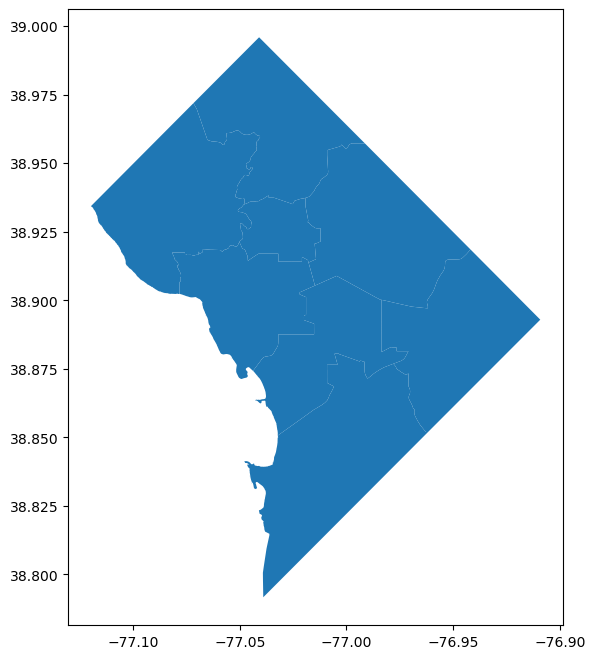

In [27]:
#visualize
WARDGEO.plot(figsize=(8,8))

In [28]:
# merge with crime dataset on  "WARD". Joins to datasets on common column.
CrimeViz = WARDGEO.merge(dc_crime_ward, left_on='WARD', right_on='WARD')
CrimeViz.head()

,WARD,geometry,centroid,CCN
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),8211
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),10766
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),10657
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),14110
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),11003


## 5- Spatial join with geopandas: Merging the high+low income data

Repeating spatial join with income: 
- Creating low income and high income datasets (three lowest/highest income ranges combined)
- Making two spatial merges using the same shapefile designating 8 wards of DC, for high/low income dataset to compare heatmaps.

In [29]:
# HIGH INCOME by wards: $ 100000 and up per household
dc_ward_income_high = dc_ward_income[['Wards','100000/149999','150000/199999','>200000']]
#add column for total high income
cols_high = ['100000/149999','150000/199999','>200000']
dc_ward_income_high['Total High Income']= dc_ward_income_high[cols_high].sum(axis=1)
dc_ward_income_high

,Wards,100000/149999,150000/199999,>200000,Total High Income
0,1,6709,5307,7950,19966
1,2,7752,4342,10355,22449
2,3,6481,4172,12240,22893
3,4,4535,3159,7593,15287
4,5,5268,3611,4623,13502
5,6,10009,6323,11512,27844
6,7,3410,1214,1533,6157
7,8,3013,1552,1257,5822


In [30]:
# merge total high income with the spatial data
High_Income = WARDGEO.merge(dc_ward_income_high, left_on='WARD', right_on='Wards').drop(columns = {'Wards','100000/149999','150000/199999','>200000'})
High_Income.head()

,WARD,geometry,centroid,Total High Income
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),5822
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),27844
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),6157
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),22449
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),19966


In [31]:
# LOW INCOME by wards: $ 25000 and lower per household
dc_ward_income_low = dc_ward_income[['Wards','<10000','10000/14999','15000/24999']]
#add column for total low income
cols_low = ['<10000','10000/14999','15000/24999']
dc_ward_income_low['Total Low Income']= dc_ward_income_low[cols_low].sum(axis=1)
dc_ward_income_low

,Wards,<10000,10000/14999,15000/24999,Total Low Income
0,1,2096,917,1499,4512
1,2,2611,831,1231,4673
2,3,1957,794,1098,3849
3,4,1641,821,1832,4294
4,5,2734,1498,2265,6497
5,6,3129,1557,1402,6088
6,7,4442,2225,2808,9475
7,8,5473,2672,3480,11625


In [32]:
# merge total low income with the spatial data
Low_Income = WARDGEO.merge(dc_ward_income_low, left_on='WARD', right_on='Wards').drop(columns = {'Wards','<10000','10000/14999','15000/24999'})
Low_Income.head()

,WARD,geometry,centroid,Total Low Income
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),11625
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),6088
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),9475
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),4673
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),4512


## 6- Extras:

- Importing income and employment rates related dataset on https://www.tracktherecovery.org/ , for compared time series analysis
- Leaving only the DC data on it.
- Applying pd to datetime to prep it for the time-series analysis

In [33]:
tracker = gpd.read_file(r"C:\Users\ilgit\OneDrive\Documents\EconomicTracker-main\data\Employment - State - Weekly.csv")
# first I transform 'statefips' to numeric, to be able to use loc by value equal to a number.
tracker[['statefips']] = tracker[['statefips']].apply(pd.to_numeric, errors = 'coerce')
# DC statefips is 11, so I only leave statefips equal to 11 in the dataset.
dc_tracker = tracker.loc[tracker['statefips']==11]
dc_tracker.head()

,year,month,day_endofweek,statefips,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,emp_ss40,emp_ss60,emp_ss65,emp_ss70,geometry
8,2020,1,17,11,.0000867,-.00332,.00118,-.00151,.000772,-.000181,.000554,-.000121,.0067,-.000396,.00147,-.00964,None
59,2020,1,24,11,.00143,-.00304,.00392,.00265,-.00046,.00328,.00295,.000758,-.00755,.000215,.00317,.00542,None
110,2020,1,31,11,.00505,.00257,.00768,.0119,-.000767,.00981,.00698,.00419,-.0123,.00255,.0109,.0198,None
161,2020,2,7,11,.00965,.0157,.00702,.0224,.00249,.0148,.00823,.0103,.000945,.00823,.0217,.0166,None
212,2020,2,14,11,.0113,.023,-.000235,.0179,.0131,.00891,.00297,.015,.0092,.0113,.0229,.0167,None


In [34]:
# I join the "year","month","day_endofweek" columns together, to create a date column: 
# we need this for pd.to_datetime transformation
cols=["year","month","day_endofweek"]
dc_tracker['date'] = dc_tracker[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dc_tracker.head()

,year,month,day_endofweek,statefips,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,emp_ss40,emp_ss60,emp_ss65,emp_ss70,geometry,date
8,2020,1,17,11,.0000867,-.00332,.00118,-.00151,.000772,-.000181,.000554,-.000121,.0067,-.000396,.00147,-.00964,None,2020-1-17
59,2020,1,24,11,.00143,-.00304,.00392,.00265,-.00046,.00328,.00295,.000758,-.00755,.000215,.00317,.00542,None,2020-1-24
110,2020,1,31,11,.00505,.00257,.00768,.0119,-.000767,.00981,.00698,.00419,-.0123,.00255,.0109,.0198,None,2020-1-31
161,2020,2,7,11,.00965,.0157,.00702,.0224,.00249,.0148,.00823,.0103,.000945,.00823,.0217,.0166,None,2020-2-7
212,2020,2,14,11,.0113,.023,-.000235,.0179,.0131,.00891,.00297,.015,.0092,.0113,.0229,.0167,None,2020-2-14


In [35]:
print(dc_tracker.columns)

Index(['year', 'month', 'day_endofweek', 'statefips', 'emp', 'emp_incq1',
       'emp_incq2', 'emp_incq3', 'emp_incq4', 'emp_incmiddle',
       'emp_incbelowmed', 'emp_incabovemed', 'emp_ss40', 'emp_ss60',
       'emp_ss65', 'emp_ss70', 'geometry', 'date'],
      dtype='object')


In [36]:
#I transform emp and date to numeric and datetime.
dc_tracker = dc_tracker[['emp','date']]
dc_tracker['emp'] = dc_tracker['emp'].apply(pd.to_numeric, errors = 'coerce')
dc_tracker['date']=pd.to_datetime(dc_tracker['date'])
dc_tracker.dtypes

emp            float64
date    datetime64[ns]
dtype: object

In [37]:
dc_tracker.head()

,emp,date
8,0.000087,2020-01-17
59,0.001430,2020-01-24
110,0.005050,2020-01-31
161,0.009650,2020-02-07
212,0.011300,2020-02-14


__________

# Analysis

- `Time-series analysis of crime patterns vs. employment rates`
    - Time-series analysis of daily crime numbers and employment rates between 2020-2022
- `Analyses by wards: Crime vs. income bar charts by 8 wards of DC`
    - Bar chart of total crime number per ward and normalization
    - Bar chart of income distribution by wards
    - Comparison of total crime number and income distribution by Wards
- `Temporal crime patterns by low vs. high income wards`
    - Comparative bar + line plot of total crime number per month of the year for high-income, low income, and downtown wards
    - Comparative bar + line plot of total crime number per day of the week for high-income, low income, and downtown wards
    - Comparative bar + line plot total crime number per hour of the day for high-income, low income, and downtown wards
- `Crime types in different wards`
    - Number of crimes by wards
    - Number of thefts by wards
    - Number of other crimes by wards
- `Crime vs. income mapping and correlation`
    - Mapping Income Distribution by Wards: Low vs. High Income Neighborhoods
    - Comparative heatmaps by Crime Type and Income Distribution (6 side-by-side map pairs)
    - Correlation table


## 1- Time-series analysis of crime patterns vs. employment rates
This part will involve crime patterns and general trend temporal analysis. It will include a time-series analysis of daily crime numbers and employment rates (which is not precisely about income but predicts so much about income patterns) between 2020 and 2022. I will visualize the crime patterns using a 30-days rolling average for a better trend display. In the end, I expect a comparative line plot describing the exact timeline on the x-axis (days) but showing trends of crime numbers and employment rates on the y-axis, and I visualize them on the same graph using ax.twinx().

### Time-series analysis of daily crime numbers and  employment rates between 2020-2022

In [38]:
# a time-series analysis of daily crime numbers
daily_crimes = dc_crime.groupby(by='Date', as_index=False).agg({'CCN':'count'})
daily_crimes.head()

,Date,CCN
0,2020-01-01,45
1,2020-01-02,74
2,2020-01-03,91
3,2020-01-04,78
4,2020-01-05,87


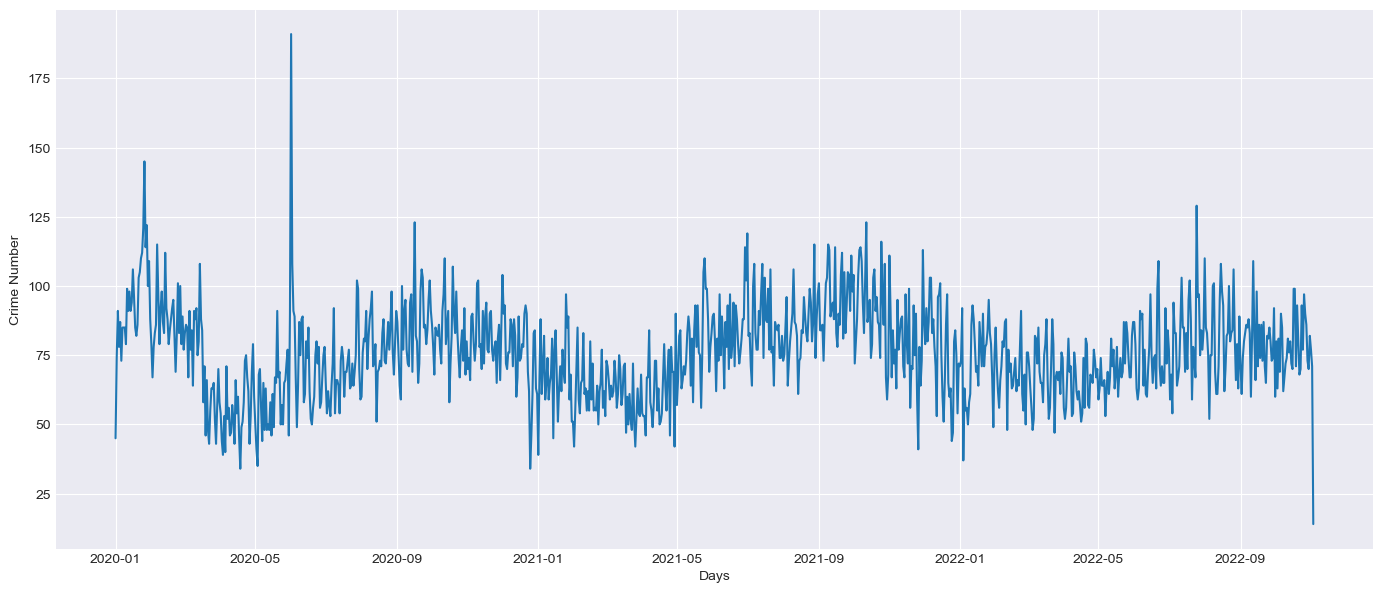

In [39]:
# visualize time-series analysis of daily crime numbers
plt.figure(figsize=(17,7))
plt.style.use('seaborn-darkgrid')
plt.plot(daily_crimes.Date, daily_crimes.CCN)
plt.xlabel('Days')
plt.ylabel('Crime Number')
plt.show()

In [40]:
# smoothen the line and see the trend better using 30-days rolling average
daily_crimes['MA'] = daily_crimes.rolling(window=30)['CCN'].mean()

In [41]:
# drop first 30 and last 30 days (because they are NaN).
N = 30
daily_crimes = daily_crimes.iloc[N: , :]
daily_crimes = daily_crimes.iloc[:-N , :]
daily_crimes

,Date,CCN,MA
30,2020-01-31,88,96.466667
31,2020-02-01,79,96.633333
32,2020-02-02,67,95.833333
33,2020-02-03,78,95.833333
34,2020-02-04,83,95.700000
...,...,...,...
1003,2022-09-30,92,79.566667
1004,2022-10-01,60,79.200000
1005,2022-10-02,80,79.833333
1006,2022-10-03,63,79.466667


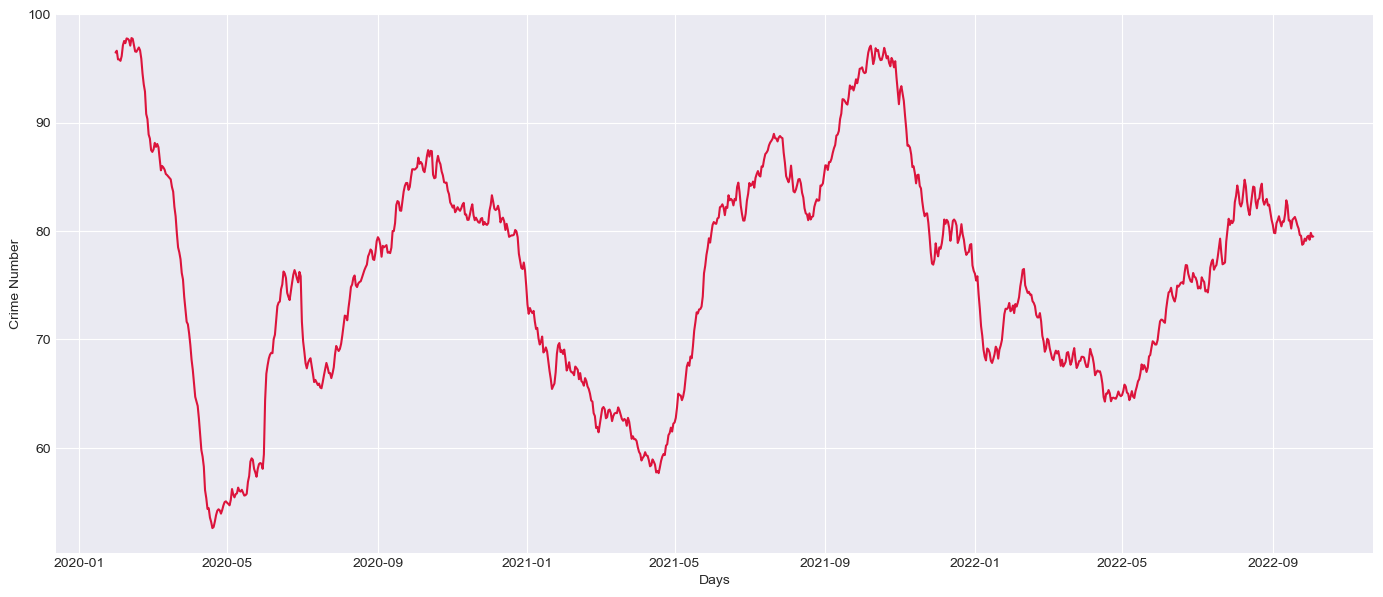

In [42]:
# visualize time-series analysis of daily crime numbers with rolling average
plt.figure(figsize=(17,7))
plt.plot(daily_crimes.Date, daily_crimes.MA, color="crimson")
plt.xlabel('Days')
plt.ylabel('Crime Number')
plt.show()

In [43]:
# a time-series analysis of weekly employment tracker (could give an idea about income, although not exactly the same thing)
dc_tracker_weekly =  dc_tracker[['date','emp']]
dc_tracker_weekly.head()

,date,emp
8,2020-01-17,0.000087
59,2020-01-24,0.001430
110,2020-01-31,0.005050
161,2020-02-07,0.009650
212,2020-02-14,0.011300


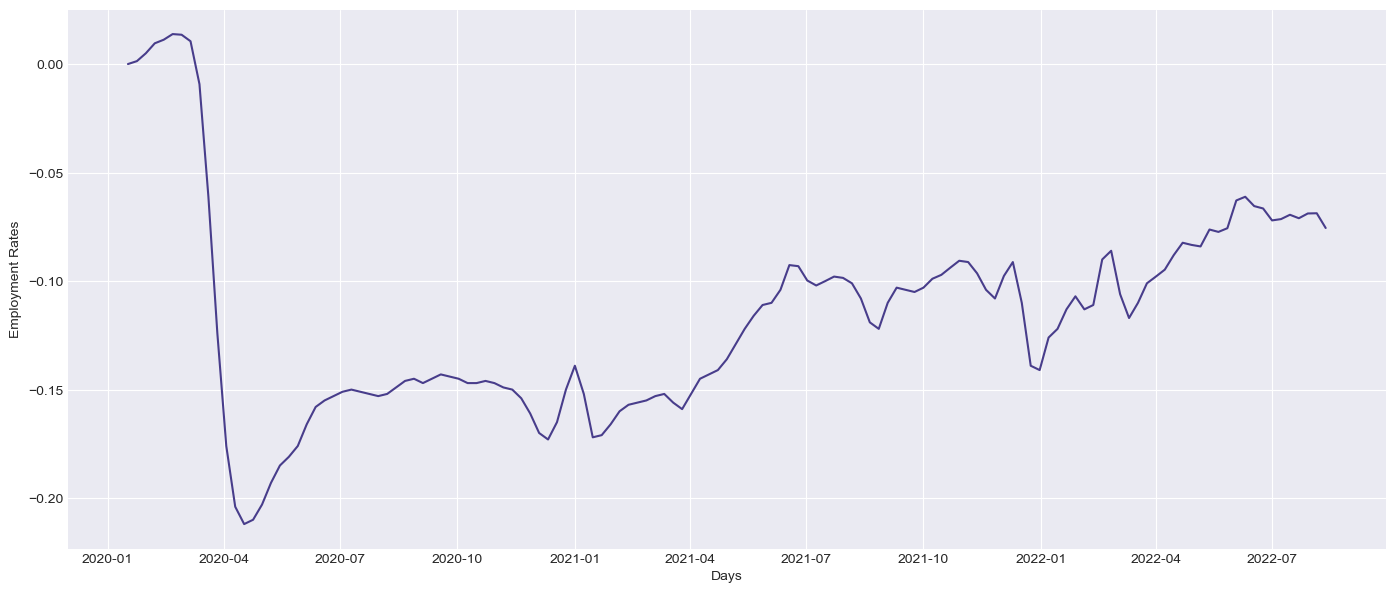

In [44]:
# visualize time-series analysis of weekly employment numbers
plt.figure(figsize=(17,7))
plt.plot(dc_tracker_weekly.date, dc_tracker_weekly.emp, color="darkslateblue")
plt.xlabel('Days')
plt.ylabel('Employment Rates')
plt.show()

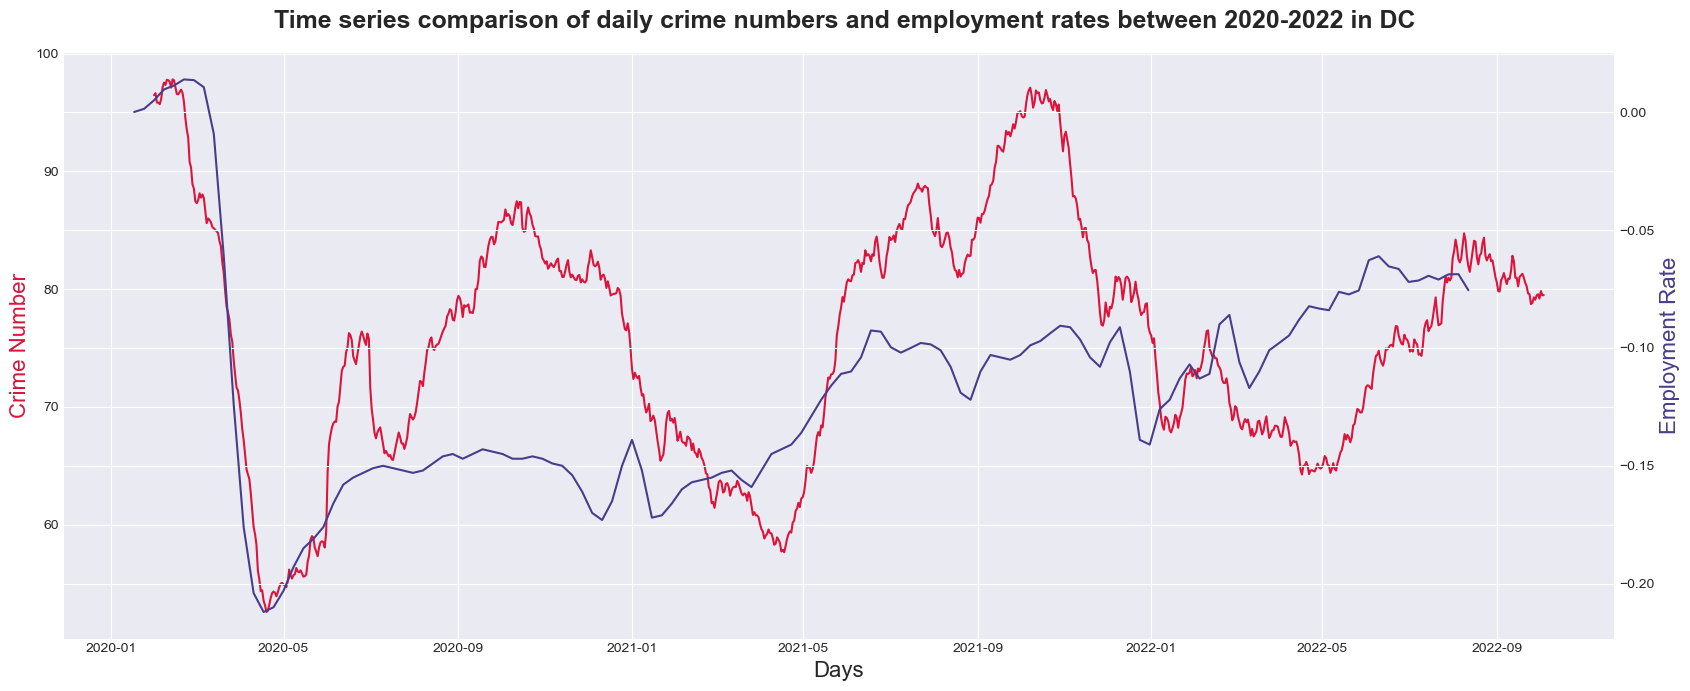

In [45]:
plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True
fig, ax1 = plt.subplots()
ax1.plot(daily_crimes.Date, daily_crimes.MA,
        color="crimson")
ax2 = ax1.twinx()
ax2.plot(dc_tracker_weekly.date, dc_tracker_weekly["emp"],color="darkslateblue")
ax1.set_xlabel('Days', fontsize=16)
ax1.set_ylabel('Crime Number', color="crimson", fontsize=16)
ax2.set_ylabel('Employment Rate' ,color="darkslateblue" , fontsize=16)
  
fig.suptitle('Time series comparison of daily crime numbers and employment rates between 2020-2022 in DC', fontsize= 18, fontweight ="bold")
fig.tight_layout()
plt.show()

#### Comments on the time-series comparison:
Looking at this time-series analysis, one can see a strong correlation between crime numbers and employment rate at some timeframes: the most eye-catching is the first COVID surge and consecutive lockdown. From June 2020, crime rates started to climb fast, decreasing in early 2021 and rising again in mid-2021. There are similarities in sudden drops and rebounds in August 2021 and late 2021. The economic effects of war, including the increase in grocery prices and gas, could have impacted the daily number of crimes. 

## 2- Analyses by wards: Crime vs. income bar charts by 8 wards of DC
I will compare the number of crimes per ward vs. income per ward in two bar charts.

To create the tables:
- First, I will use the function `groupby` to group the data per ward and aggregate the number of total crimes per ward `.agg{'column1': 'count'}.` 
- Secondly, I will do the same for the income dataset and group by ward and aggregate the total income per ward using `.agg{'column1': 'sum'}.`

I should also normalize the column (total number of each crime per ward and income per ward) values per ward's population. I will do that by `total number of each crime per ward` / `population of the ward` * 100000.
 
Then, I will use two bar charts using matplotlib with the wards on the x-axis, crime number on the first chart's y-axis, and total income on the second chart's y-axis. 

### Bar chart of total crime number per ward and normalization

In [46]:
# Total crime number by ward
dc_crime_ward = dc_crime.groupby(by='WARD',as_index=False).agg({'CCN':'count'})
dc_crime_ward

,WARD,CCN
0,1,11003
1,2,14110
2,3,4304
3,4,7408
4,5,12512
5,6,10766
6,7,10657
7,8,8211


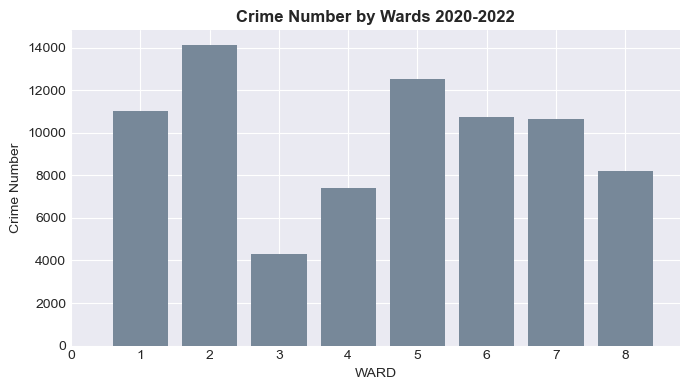

In [47]:
# Bar chart of total crime number by ward
plt.figure(figsize=(7,4))
plt.bar(dc_crime_ward.WARD, dc_crime_ward.CCN, color='lightslategray')
plt.xlabel('WARD')
plt.ylabel('Crime Number')
plt.xticks(np.arange(9))
plt.title('Crime Number by Wards 2020-2022', fontsize=12, fontweight ="bold")
plt.show()

In [48]:
# population by ward
ward_pop = [85285, 81904, 85301,84660,89425,108202,76255,78513]

#creating a population column in dc_crime_ward dataset using the list above
dc_crime_ward['population'] = ward_pop

#normalizing by 100000, adding the normalized column
dc_crime_ward['normalized'] = dc_crime_ward['CCN'] / dc_crime_ward['population'] *100000
dc_crime_ward

,WARD,CCN,population,normalized
0,1,11003,85285,12901.448086
1,2,14110,81904,17227.485837
2,3,4304,85301,5045.661833
3,4,7408,84660,8750.295299
4,5,12512,89425,13991.613084
5,6,10766,108202,9949.908504
6,7,10657,76255,13975.477018
7,8,8211,78513,10458.140690


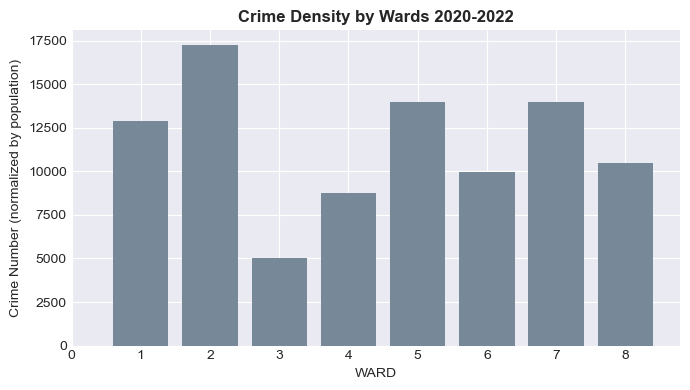

In [49]:
# Visualization of total crime number (normalized by population) by ward
plt.figure(figsize=(7,4))
plt.bar(dc_crime_ward.WARD, dc_crime_ward.normalized, color='lightslategray')
plt.xlabel('WARD')
plt.ylabel('Crime Number (normalized by population)')
plt.xticks(np.arange(9))
plt.title('Crime Density by Wards 2020-2022', fontsize=12,fontweight ="bold")

plt.savefig('CrimeDensitybyWards.png')
plt.show()

### Bar chart of income distribution by wards

In [50]:
# I will use the income ranges by wards dataset: 
dc_ward_income

,Wards,<10000,10000/14999,15000/24999,25000/34999,35000/49999,50000/74999,75000/99999,100000/149999,150000/199999,>200000
0,1,2096,917,1499,1493,2224,4107,4060,6709,5307,7950
1,2,2611,831,1231,1224,1695,4752,4064,7752,4342,10355
2,3,1957,794,1098,1243,1428,4079,4016,6481,4172,12240
3,4,1641,821,1832,1677,2761,4310,3083,4535,3159,7593
4,5,2734,1498,2265,2297,3262,4921,4185,5268,3611,4623
5,6,3129,1557,1402,1679,2032,4477,5249,10009,6323,11512
6,7,4442,2225,2808,2862,3046,5308,3093,3410,1214,1533
7,8,5473,2672,3480,3522,4450,3834,2941,3013,1552,1257


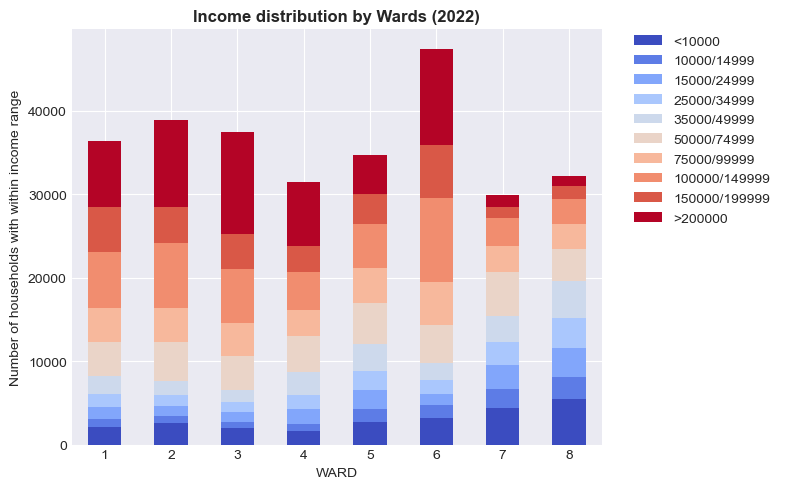

In [51]:
# Using this table, I will make a stacked bar chart signifying every income range.
# Therefore, the income distribution for each ward.
ax2 = dc_ward_income.plot.bar(x='Wards', stacked=True, figsize=(8,5),cmap='coolwarm')
ax2.set_title('Income Distribution by Wards', fontsize=14)
ax2.set_xticklabels(np.arange(8)+1, rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('WARD')
plt.ylabel('Number of households with within income range')
plt.title('Income distribution by Wards (2022)', fontsize=12, fontweight ="bold")

plt.show()

### Comparison of total crime number and income distribution by Wards

(-1.0, 8.0)

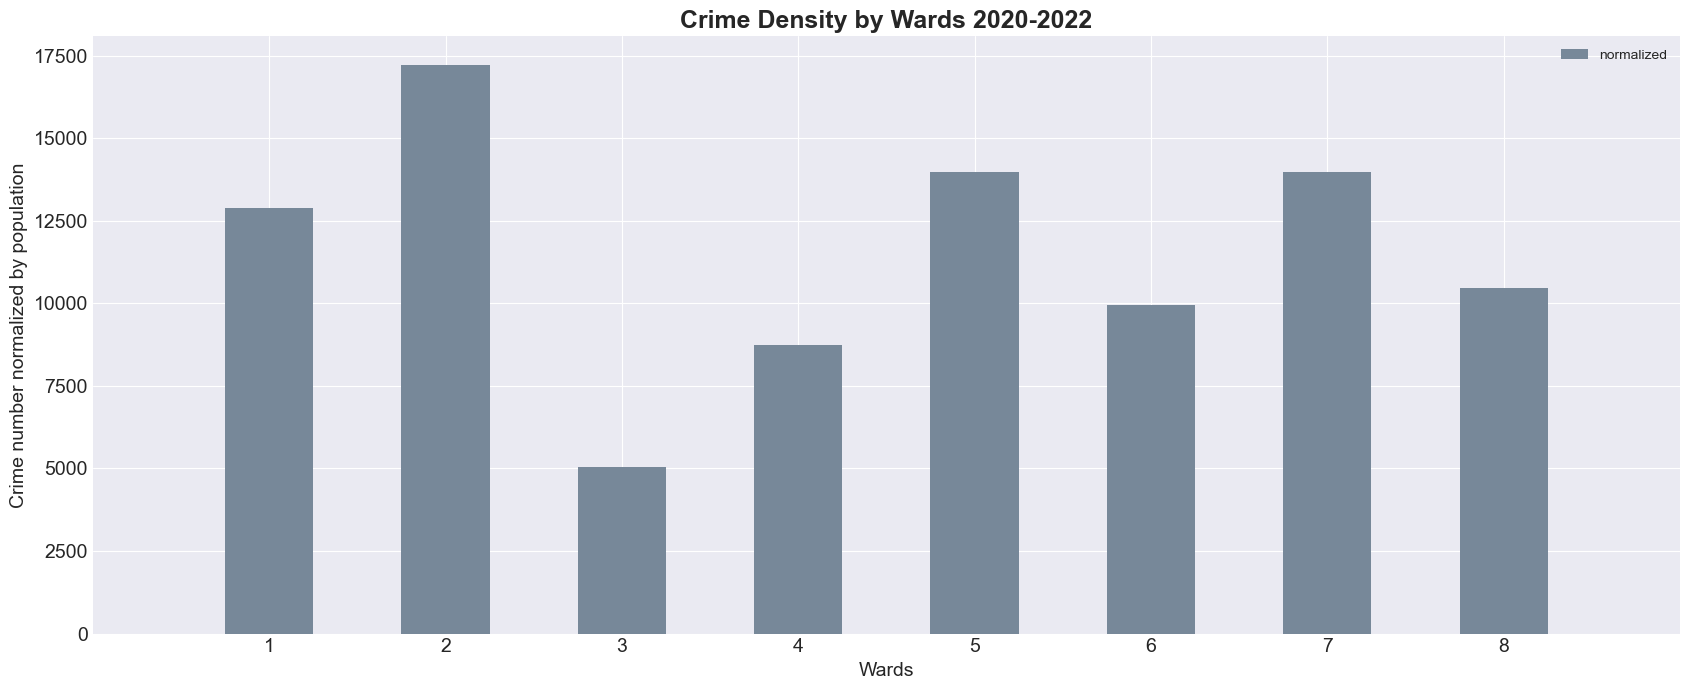

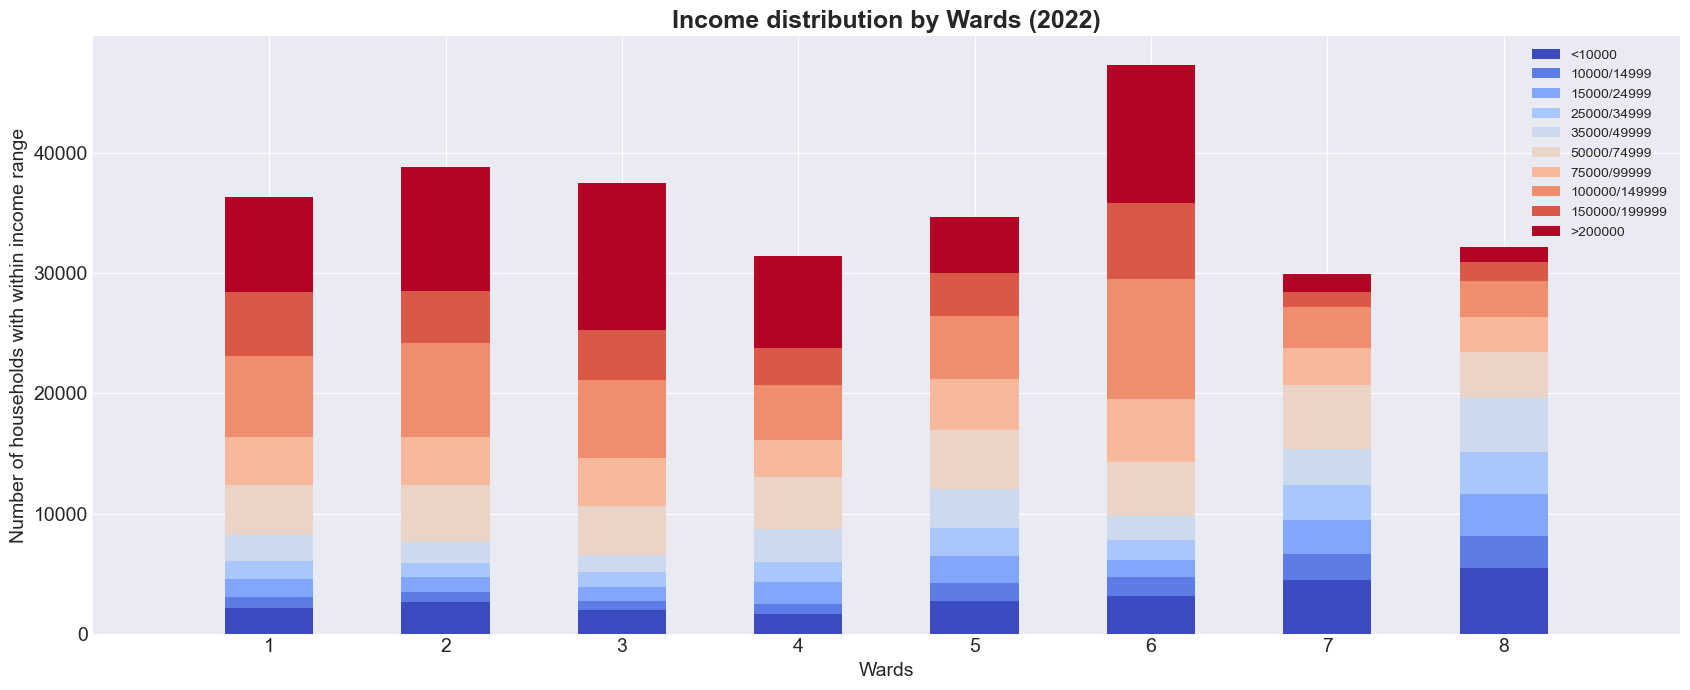

In [52]:
# compare two graphs: total crime number per ward (normalized by population), income distibution per ward

ax1 = dc_crime_ward.plot.bar(x='WARD', y='normalized',fontsize=14, color='lightslategray')
ax1.set_title('Crime Density by Wards 2020-2022', fontsize=18, fontweight ="bold")
ax1.set_xticklabels(np.arange(8)+1, rotation=0)
plt.xlabel('Wards', fontsize=14)
plt.ylabel('Crime number normalized by population', fontsize=14)

ax2 = dc_ward_income.plot.bar(x='Wards', stacked=True ,fontsize=14 ,cmap='coolwarm')
ax2.set_xticklabels(np.arange(8)+1, rotation=0)
plt.xlabel('Wards', fontsize=14)
plt.ylabel('Number of households with within income range', fontsize=14)
plt.title('Income distribution by Wards (2022)', fontsize=18, fontweight ="bold") 

ax1.set_xlim(-1,8)
ax2.set_xlim(-1,8)

#### Comments on the comparison crime number per ward (normalized by population) vs. income distribution per ward
We can see some general patterns of inverse correlation between high-income density vs. crime density, especially in Wards 3-6. We can also understand that low-income dense wards such as Wards 7-8 have relatively higher crime densities. However, in neighborhoods where the wealth seems typically distributed, such as wards 1-2-5, we see a very high crime density. This analysis gives an idea of what is happening but needs to provide more detail to conclude that there is a correlation between crime density and income distribution across wards. 

Also, this analysis brings new questions such as:
- 'Are there some similarities in crime density patterns within and across wards?'
- 'do some wards have similarities in temporal patterns of crime?
- 'do crime types play a role in differentiating crime density patterns across wards?

## 3- Temporal crime patterns by low vs. high income wards
Next, I will attempt to understand temporal patterns of crime in low vs. high-income wards and downtown, and I will be able to compare which areas may be safer or more dangerous at certain days of the week or certain times of the day. I will propose the following:
A bar plot was showing all crimes by time on the x-axis. Additional lines on the chart each signify low-income / high-income / downtown total crime number within the same time axis.
- Comparative bar + line plot of total crime number per month of the year for high-income, low income, and downtown wards
- Comparative bar + line plot of total crime number per day of the week for high-income, low income, and downtown wards
- Comparative bar + line plot total crime number per hour of the day for high-income, low income, and downtown wards

### Comparative bar + line plot of total crime number per month of the year for high income, low income and downtown wards

In [53]:
dc_crime_month = dc_crime.groupby(by='Month',as_index=False).agg({'CCN':'count'})

In [54]:
# total crime number only in low income neighborhoods: 7,8)
dc_crime_LI = dc_crime.loc[(dc_crime['WARD']== 7) |(dc_crime['WARD']== 8)]
dc_crime_month_LI = dc_crime_LI.groupby(by='Month',as_index=False).agg({'CCN':'count'})

In [55]:
# total crime number only in high income neighborhoods: 3,6)
dc_crime_HI = dc_crime.loc[(dc_crime['WARD']== 3) |(dc_crime['WARD']== 6)]
dc_crime_month_HI = dc_crime_HI.groupby(by='Month',as_index=False).agg({'CCN':'count'})

In [56]:
# total crime number only in downtown: 1,2)
dc_crime_DT = dc_crime.loc[(dc_crime['WARD']== 1) |(dc_crime['WARD']== 2)]
dc_crime_month_DT = dc_crime_DT.groupby(by='Month',as_index=False).agg({'CCN':'count'})

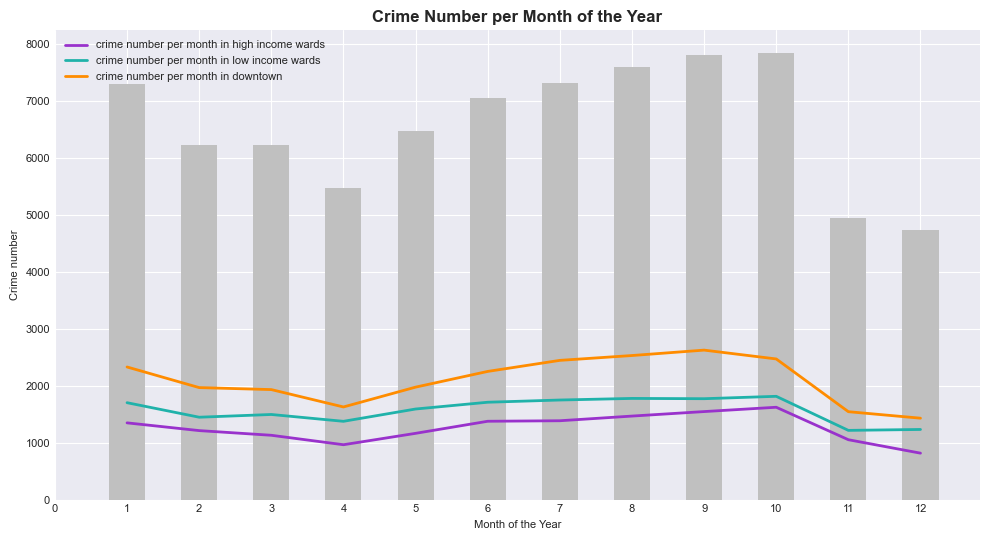

In [57]:
plt.figure(figsize=(10,5.5))
plt.bar(dc_crime_month.Month, dc_crime_month.CCN, width=0.5, color = 'silver')
plt.plot(dc_crime_month_HI.Month,dc_crime_month_HI.CCN, color='darkorchid', linewidth=2)
plt.plot(dc_crime_month_LI.Month,dc_crime_month_LI.CCN, color='lightseagreen', linewidth=2)
plt.plot(dc_crime_month_DT.Month,dc_crime_month_DT.CCN, color='darkorange', linewidth=2)
plt.xticks(np.arange(13),fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Month of the Year',fontsize=8)
plt.ylabel('Crime number',fontsize=8)
plt.title('Crime Number per Month of the Year', fontsize=12, fontweight ="bold")
plt.legend(['crime number per month in high income wards','crime number per month in low income wards',
           'crime number per month in downtown'], fontsize=8)

plt.show()

### Comparative bar + line plot of total crime number per day of the week for high income, low income and downtown wards

In [58]:
# total crime number per hour of the day
dc_crime_DOW = dc_crime.groupby(by='DOW',as_index=False).agg({'CCN':'count'})

In [59]:
#only low income wards
dc_crime_DOW_LI = dc_crime_LI.groupby(by='DOW',as_index=False).agg({'CCN':'count'})

In [60]:
#only high income wards
dc_crime_DOW_HI = dc_crime_HI.groupby(by='DOW',as_index=False).agg({'CCN':'count'})

In [61]:
# only downtown wards
dc_crime_DOW_DT = dc_crime_DT.groupby(by='DOW',as_index=False).agg({'CCN':'count'})

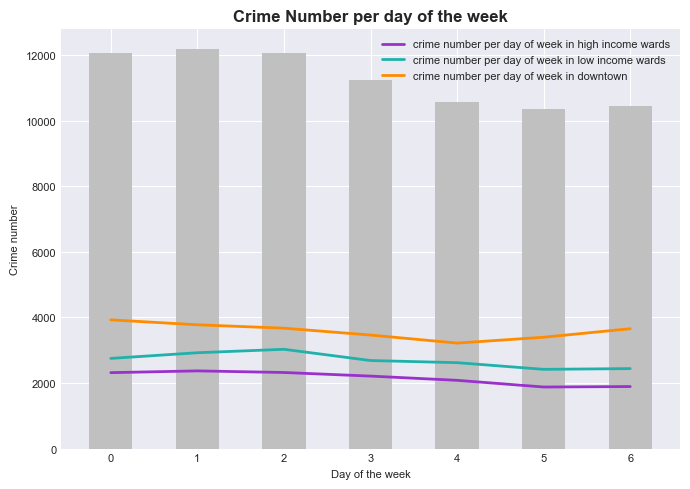

In [62]:
plt.figure(figsize=(7,5))
plt.bar(dc_crime_DOW.DOW, dc_crime_DOW.CCN, width=0.5, color = 'silver')
plt.plot(dc_crime_DOW_HI.DOW,dc_crime_DOW_HI.CCN, color='darkorchid', linewidth=2)
plt.plot(dc_crime_DOW_LI.DOW,dc_crime_DOW_LI.CCN, color='lightseagreen', linewidth=2)
plt.plot(dc_crime_DOW_DT.DOW,dc_crime_DOW_DT.CCN, color='darkorange', linewidth=2)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Day of the week',fontsize=8)
plt.ylabel('Crime number',fontsize=8)
plt.title('Crime Number per day of the week', fontsize=12, fontweight ="bold")
plt.legend(['crime number per day of week in high income wards','crime number per day of week in low income wards',
           'crime number per day of week in downtown'], fontsize=8)

plt.show()

### Comparative bar + line chart total crime number per hour of the day for high income, low income and downtown wards

In [63]:
# total crime number per hour of the day
dc_crime_hour = dc_crime.groupby(by='Hour',as_index=False).agg({'CCN':'count'})

In [64]:
dc_crime_hour_LI = dc_crime_LI.groupby(by='Hour',as_index=False).agg({'CCN':'count'})

In [65]:
dc_crime_hour_HI = dc_crime_HI.groupby(by='Hour',as_index=False).agg({'CCN':'count'})

In [66]:
dc_crime_hour_DT = dc_crime_DT.groupby(by='Hour',as_index=False).agg({'CCN':'count'})

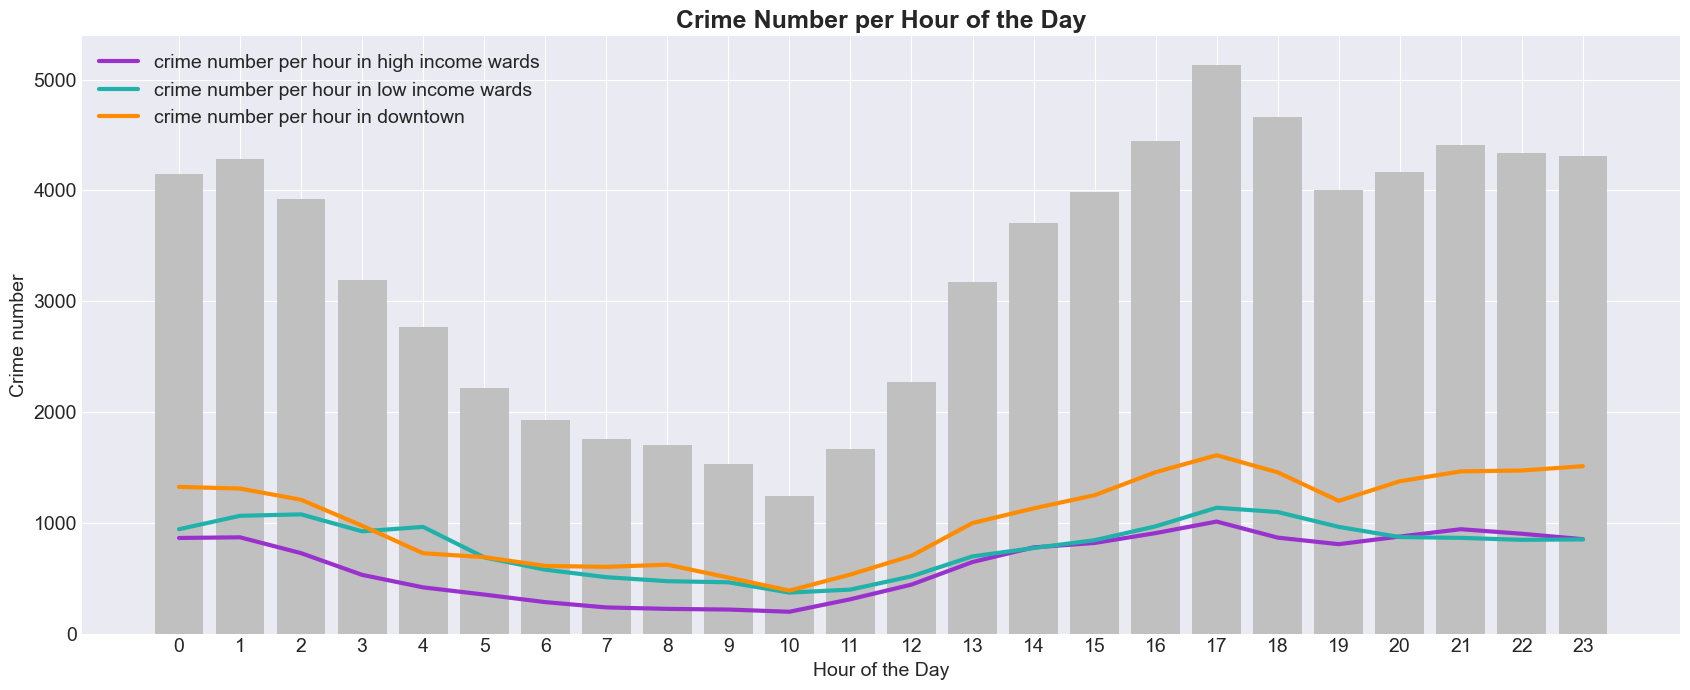

In [67]:
plt.figure(figsize=(17,7))
plt.bar(dc_crime_hour.Hour, dc_crime_hour.CCN, color = 'silver')
plt.plot(dc_crime_hour_HI.Hour,dc_crime_hour_HI.CCN, color='darkorchid', linewidth=3)
plt.plot(dc_crime_hour_LI.Hour,dc_crime_hour_LI.CCN, color='lightseagreen', linewidth=3)
plt.plot(dc_crime_hour_DT.Hour,dc_crime_hour_DT.CCN, color= 'darkorange', linewidth=3)
plt.xticks(np.arange(24),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Hour of the Day',fontsize=14)
plt.ylabel('Crime number',fontsize=14)
plt.title('Crime Number per Hour of the Day', fontsize=18, fontweight ="bold")
plt.legend(['crime number per hour in high income wards','crime number per hour in low income wards',
           'crime number per hour in downtown'], fontsize=14)

plt.show()


#### Comments on the three temporal crime activity by low vs. high income wards:
We see that the general temporal trend is similar to the high-low income wards temporal trends. The most crucial result is fewer crimes in high-income neighborhoods than in low-income wards. There is not a particular time of the week or month of the year that these groups of wards show out-of-the-ordinary patterns. However, between 1 am and 5 am, low-income neighborhoods have significantly more crimes than high-income neighborhoods, meaning that low-income wards are more likely to be dangerous at night, depending on the crime type. 

Another significant result is that the downtown has much more crime than low/high-income neighborhoods. It is because high-low-income neighborhoods are primarily residential areas and crimes are more likely to happen in areas with various functions in the built environment. 

To understand the patterns of why there are certain tendencies in some areas, like more crime at night, we need to investigate the crime types in different wards.

## 4- Crime types in different wards
Here, I will first filter by wards (using the function loc), group by crime types (using the function groupby) for each ward, and aggregate the crime number using `.agg{'column1': 'count'}.` Then I will concatenate each ward to have a table with wards as an index and different crime types with numbers as columns.

I will provide a horizontally grouped bar chart where we see the total number of each crime type per ward comparatively. Here, I will elaborate more on which types of crime are more common in each neighborhood and how this compares to the ward's income level.

In [68]:
dc_crime_type = dc_crime.groupby(by='OFFENSE').agg({'CCN':'count'})
dc_crime_type

,CCN
OFFENSE,
ARSON,21
ASSAULT W/DANGEROUS WEAPON,4492
BURGLARY,3516
HOMICIDE,593
MOTOR VEHICLE THEFT,9697
ROBBERY,5778
SEX ABUSE,488
THEFT F/AUTO,23523
THEFT/OTHER,30863


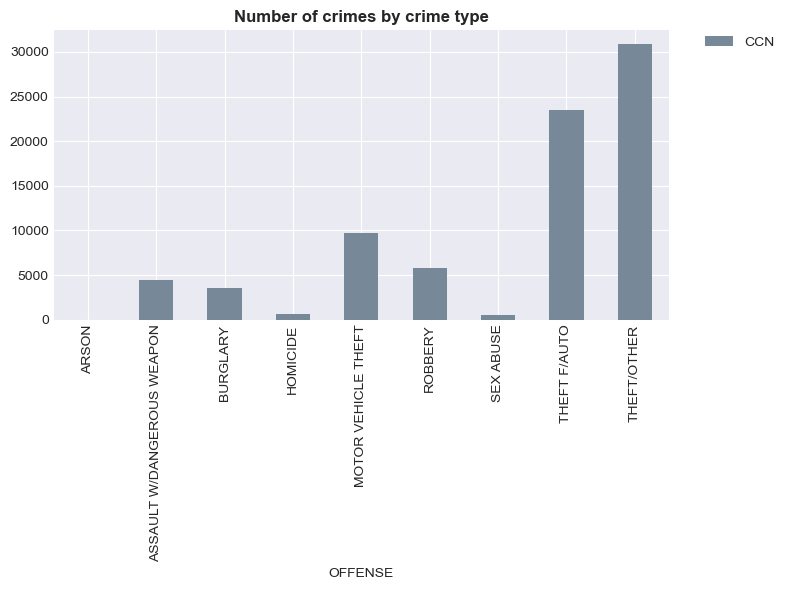

In [69]:
ax = dc_crime_type.plot.bar (figsize=(8,6), color='lightslategray' )
ax.set_title('Number of crimes by crime type', fontsize=12, fontweight ="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [70]:
# for each crime: define a dataframe, filter the crime, then group by ward.
dc_crime_ward_theft = dc_crime.loc[dc_crime['OFFENSE'] == 'THEFT/OTHER']
dc_crime_ward_theft = dc_crime_ward_theft.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'theft'})

In [71]:
dc_crime_ward_assault = dc_crime.loc[dc_crime['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON']
dc_crime_ward_assault = dc_crime_ward_assault.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'assault'})

In [72]:
dc_crime_ward_car = dc_crime.loc[dc_crime['OFFENSE'] == 'THEFT F/AUTO']
dc_crime_ward_car = dc_crime_ward_car.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'car theft'})

In [73]:
dc_crime_ward_arson = dc_crime.loc[dc_crime['OFFENSE'] == 'ARSON']
dc_crime_ward_arson = dc_crime_ward_arson.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'arson'})

In [74]:
dc_crime_ward_burg = dc_crime.loc[dc_crime['OFFENSE'] == 'BURGLARY']
dc_crime_ward_burg = dc_crime_ward_burg.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'burglary'})

In [75]:
dc_crime_ward_homi = dc_crime.loc[dc_crime['OFFENSE'] == 'HOMICIDE']
dc_crime_ward_homi = dc_crime_ward_homi.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'homicide'})

In [76]:
dc_crime_ward_motor = dc_crime.loc[dc_crime['OFFENSE'] == 'MOTOR VEHICLE THEFT']
dc_crime_ward_motor = dc_crime_ward_motor.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'motor theft'})

In [77]:
dc_crime_ward_rob = dc_crime.loc[dc_crime['OFFENSE'] == 'ROBBERY']
dc_crime_ward_rob = dc_crime_ward_rob.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'robbery'})

In [78]:
dc_crime_ward_abuse = dc_crime.loc[dc_crime['OFFENSE'] == 'SEX ABUSE']
dc_crime_ward_abuse = dc_crime_ward_abuse.groupby(by= 'WARD',as_index=False).agg({'CCN':'count'}).rename(columns={'CCN': 'sex abuse'})

In [79]:
# using a lambda function, I merge the above dataframes on ward column.
from functools import reduce
dataframes = [dc_crime_ward_theft,dc_crime_ward_assault,dc_crime_ward_car,dc_crime_ward_arson,dc_crime_ward_burg,dc_crime_ward_homi,
              dc_crime_ward_motor,dc_crime_ward_rob,dc_crime_ward_abuse]
dc_crime_ward_type = reduce(lambda  left,right: pd.merge(left,right,on=['WARD'],
                                            how='outer'), dataframes)
dc_crime_ward_type

,WARD,theft,assault,car theft,arson,burglary,homicide,motor theft,robbery,sex abuse
0,1,4614,378,3463,1.0,394,36,1259,808,50
1,2,7086,296,4219,5.0,725,25,1130,569,55
2,3,1992,74,1551,1.0,229,7,319,108,23
3,4,2528,253,2962,NaN,265,35,871,461,33
4,5,4354,798,4097,5.0,614,80,1535,952,77
5,6,4823,369,2926,2.0,420,33,1475,657,61
6,7,3151,1057,2674,4.0,427,163,1838,1247,96
7,8,2315,1267,1631,3.0,442,214,1270,976,93


In [80]:
#I drop arson because it's too low
dc_crime_ward_type.drop(dc_crime_ward_type.columns[4], axis=1, inplace=True)
dc_crime_ward_type

,WARD,theft,assault,car theft,burglary,homicide,motor theft,robbery,sex abuse
0,1,4614,378,3463,394,36,1259,808,50
1,2,7086,296,4219,725,25,1130,569,55
2,3,1992,74,1551,229,7,319,108,23
3,4,2528,253,2962,265,35,871,461,33
4,5,4354,798,4097,614,80,1535,952,77
5,6,4823,369,2926,420,33,1475,657,61
6,7,3151,1057,2674,427,163,1838,1247,96
7,8,2315,1267,1631,442,214,1270,976,93


In [81]:
# I will separate theft types because their numbers are very high, they are dominating the plot if there is just one plot.
dc_crime_ward_theft= dc_crime_ward_type[['theft','car theft','motor theft','WARD']]

Text(0.5, 1.0, 'Theft numbers per ward')

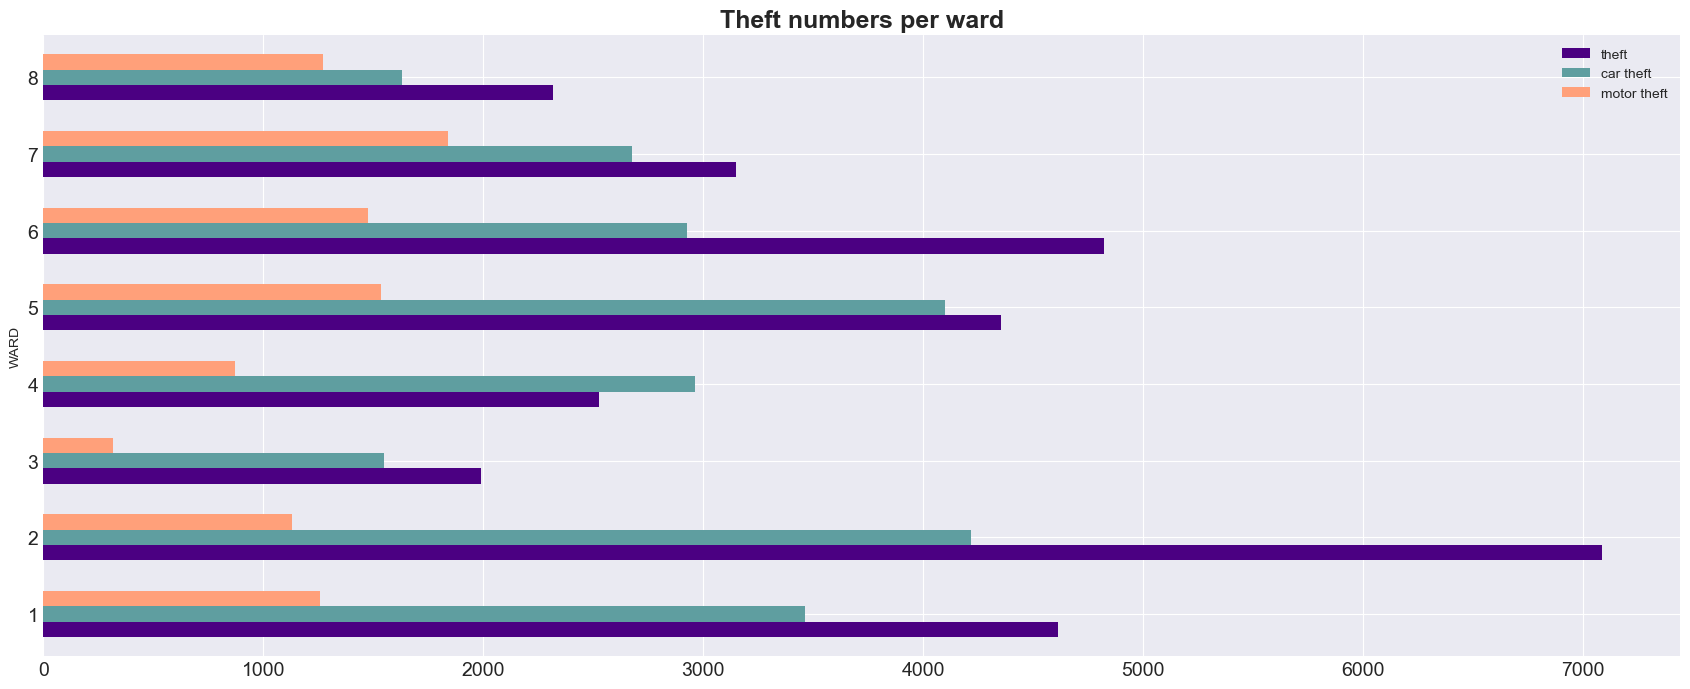

In [82]:
dc_crime_ward_theft.plot.barh(x= 'WARD',width=0.6, color=['indigo','cadetblue','lightsalmon'], fontsize= 14)
plt.title('Theft numbers per ward', fontsize=18, fontweight ="bold")

In [83]:
# other types of crime per ward
dc_crime_ward_other= dc_crime_ward_type[['assault','burglary','homicide','robbery','sex abuse','WARD']]

Text(0.5, 1.0, 'Other crime numbers per ward')

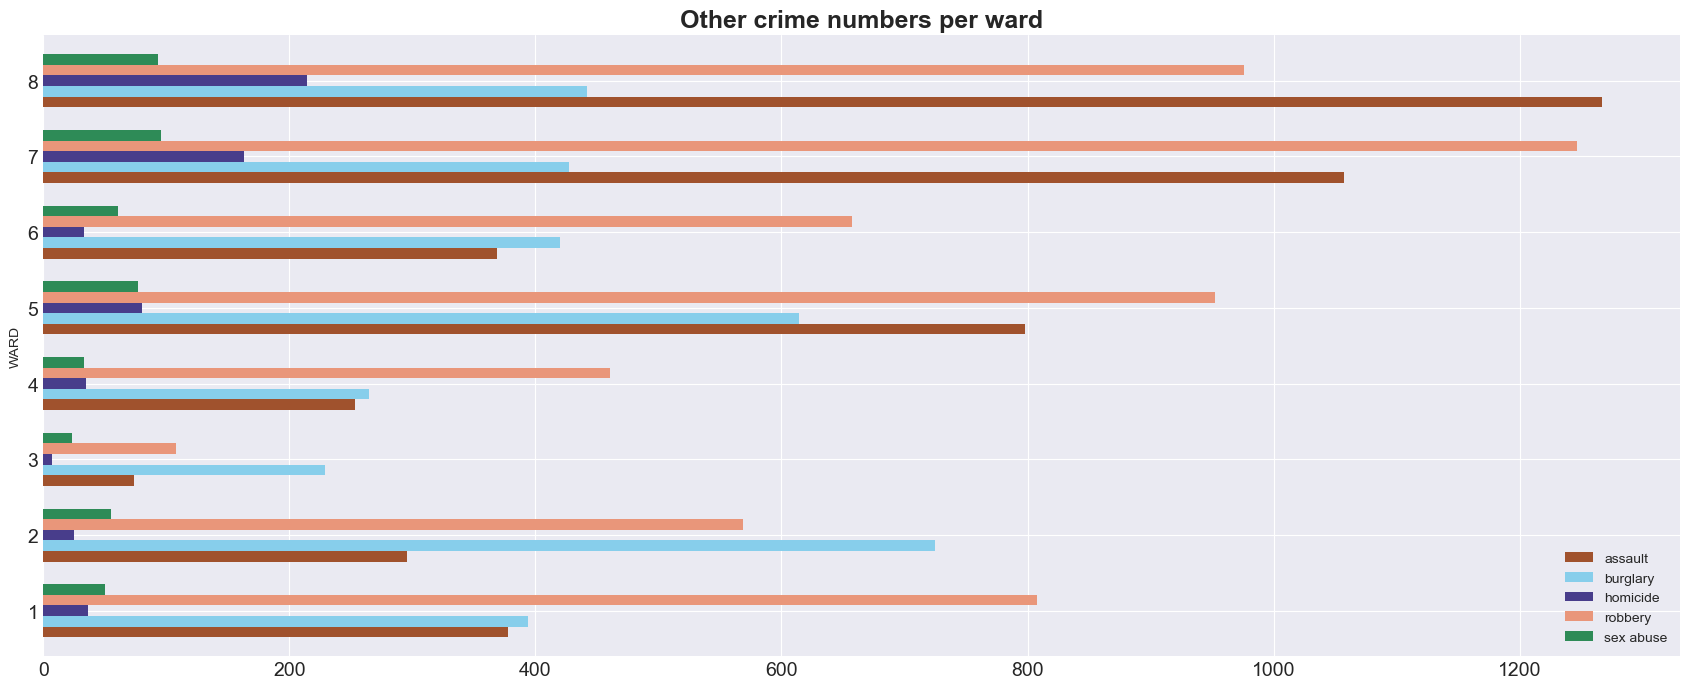

In [84]:
dc_crime_ward_other.plot.barh(x= 'WARD',width=0.7, title='Other crimes numbers per ward', fontsize=14, color=['sienna','skyblue','darkslateblue','darksalmon','seagreen'])
plt.title('Other crime numbers per ward', fontsize=18, fontweight ="bold")

#### Comments on the plots visualizing theft and other crime numbers by ward:
Here, we begin to understand things better. The bar plot result for other crimes per ward suggests that crimes such as assault, robbery, and homicide are more likely to happen in low-income neighborhoods than anywhere else, including downtown. To look into how these distributions might relate to the high and low-income distribution by wards, I will elaborate on the geospatial mapping of crime numbers and household income range numbers per ward.  

On the other hand, the theft crime per ward chart shows similar trends to what we have seen in all crimes by ward results. That is because theft crimes are very high and carry the same movements with total crime distribution by wards. 

## 5- Crime vs. income mapping and correlation
I intend to visualize the number of crimes per each type of crime by wards and low vs. high-income distribution by wards on side-by-side choropleth maps using Geopandas.

I will use this dataset for crime data: dc_crime_ward_type. I provide it in the previous section.

Additionally, I will use High_Income and Low_Income datasets where there are geometry values for each ward and the number of households having >100000 and <25000 in each dataset, respectively.

### Mapping Income Distribution by Wards: Low vs. High Income Neighborhoods

In [85]:
# Households earning more than $100000
High_Income.head()

,WARD,geometry,centroid,Total High Income
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),5822
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),27844
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),6157
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),22449
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),19966


In [86]:
# Households earning less than $25000
Low_Income.head()

,WARD,geometry,centroid,Total Low Income
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),11625
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),6088
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),9475
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),4673
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),4512


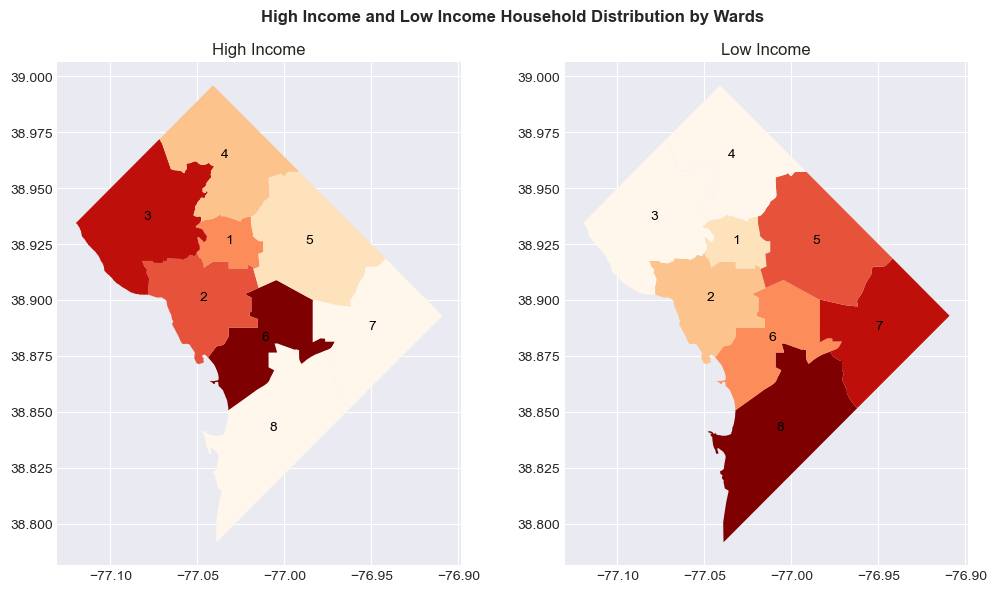

In [87]:
# create subplots side by side and sets general title
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("High Income and Low Income Household Distribution by Wards", fontsize=12, fontweight ="bold" )

# Visualize High income and low income plots, k and quantiles uses the quantile method to adjust the distribution of heatmaps.
High_Income.plot( column='Total High Income', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])

#sets titles
axes[0].set_title('High Income')
axes[1].set_title('Low Income')

# annotates ward numbers on geometries
for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

#### Comments on the High Income and Low Income Household Distribution by Wards:
On these heatmaps, we can see the spatial differentiation of low vs. high income wards. NW wards and Capitol Hill (6) are the most high income dense wards, and they are geographically defined. Ward 3 is limited on the east with the Rock Creek Park which is a natural barrier. On the other hand, Wards 7 and 8 are the most low income dense wards. They are defined also by geographical feature, both are across the Anacostia River. So these low and high income wards (especially 3,7,8) are spatially segregated as well as economically differentiated. 

### Comparative heatmaps by Crime Type and Income Distribution
To illustrate my point, I will visualize certain types of crime merged where it makes sense to assess the correlation between income distribution and crime density. These are:
- All Theft
- Assault
- Homicide
- Burglary
- Robbery
- Sex abuse

In [88]:
# I create the above listed crime type geodatasets, 
# merging geodataset WARDGEO and the dataset for every type of crime on column "WARD"
# same principle as every other merged geodataset that I am going to create below.
TheftViz = WARDGEO.merge(dc_crime_ward_theft, left_on='WARD', right_on='WARD')
TheftViz['AllTheft'] = TheftViz['theft'] + TheftViz['car theft'] + TheftViz['motor theft']
TheftViz.head()

,WARD,geometry,centroid,theft,car theft,motor theft,AllTheft
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),2315,1631,1270,5216
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),4823,2926,1475,9224
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),3151,2674,1838,7663
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),7086,4219,1130,12435
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),4614,3463,1259,9336


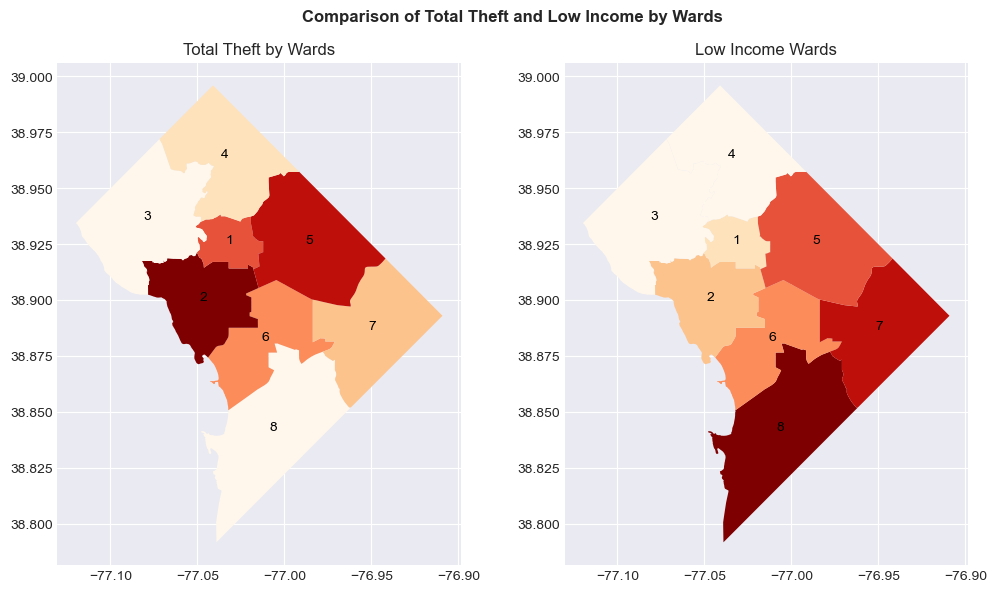

In [89]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Theft and Low Income by Wards", fontsize=12, fontweight ="bold" )

TheftViz.plot( column='AllTheft', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Theft by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

In [90]:
AssaultViz = WARDGEO.merge(dc_crime_ward_assault, left_on='WARD', right_on='WARD')
AssaultViz.head()

,WARD,geometry,centroid,assault
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),1267
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),369
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),1057
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),296
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),378


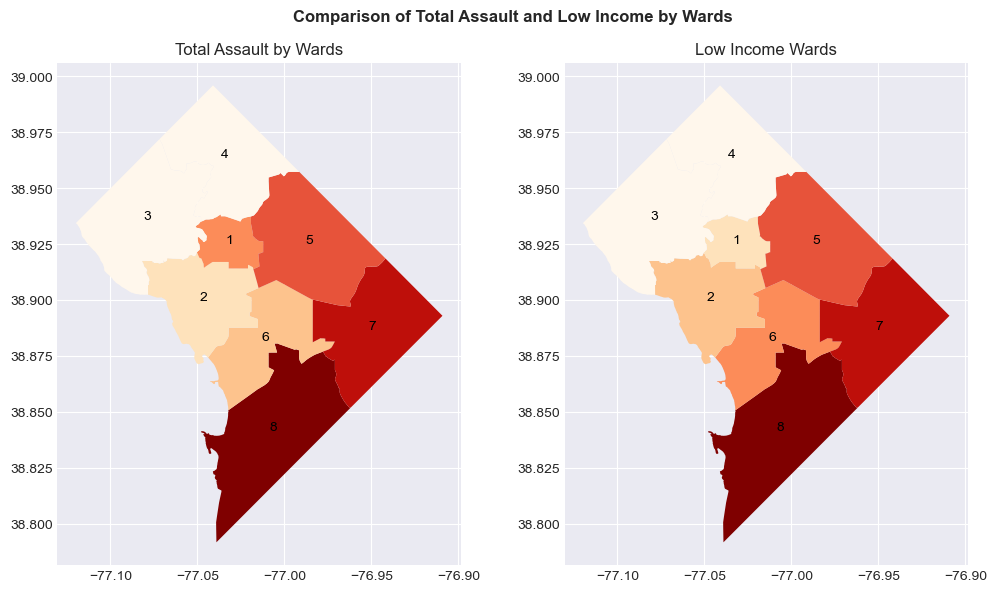

In [91]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Assault and Low Income by Wards", fontsize=12, fontweight ="bold" )

AssaultViz.plot( column='assault', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Assault by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

In [92]:
HomiViz = WARDGEO.merge(dc_crime_ward_homi, left_on='WARD', right_on='WARD')
HomiViz.head()

,WARD,geometry,centroid,homicide
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),214
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),33
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),163
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),25
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),36


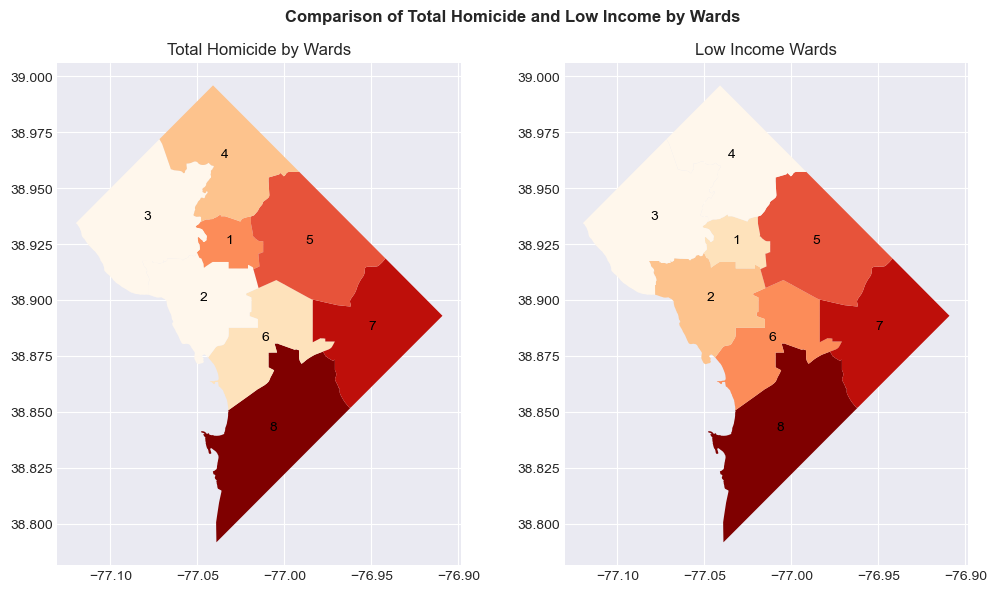

In [93]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Homicide and Low Income by Wards", fontsize=12, fontweight ="bold" )

HomiViz.plot( column='homicide', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Homicide by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

In [94]:
BurgViz = WARDGEO.merge(dc_crime_ward_burg, left_on='WARD', right_on='WARD')
BurgViz.head()

,WARD,geometry,centroid,burglary
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),442
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),420
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),427
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),725
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),394


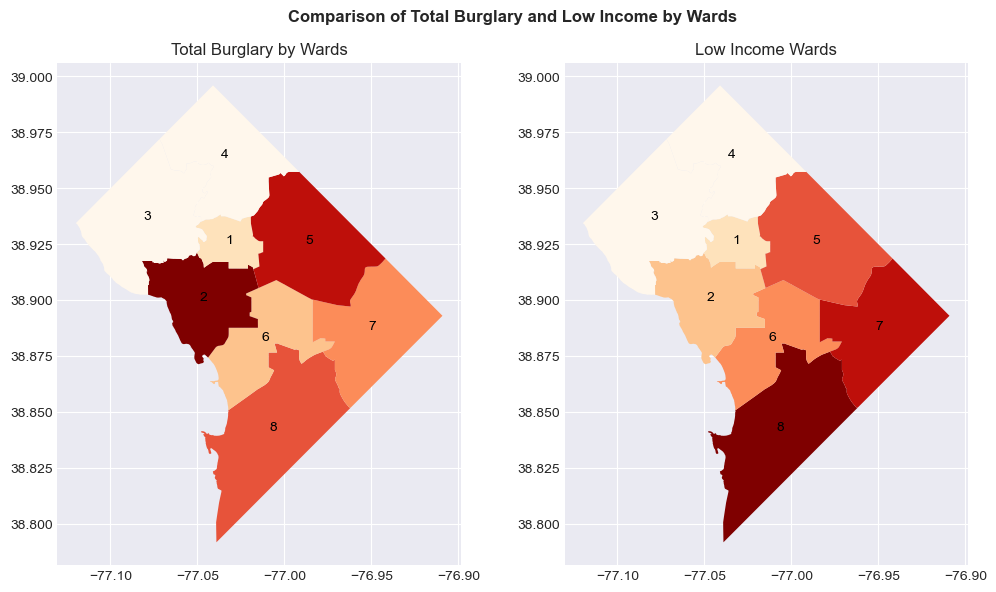

In [95]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Burglary and Low Income by Wards", fontsize=12, fontweight ="bold" )

BurgViz.plot( column='burglary', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Burglary by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

In [96]:
RobViz = WARDGEO.merge(dc_crime_ward_rob, left_on='WARD', right_on='WARD')
RobViz.head()

,WARD,geometry,centroid,robbery
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),976
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),657
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),1247
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),569
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),808


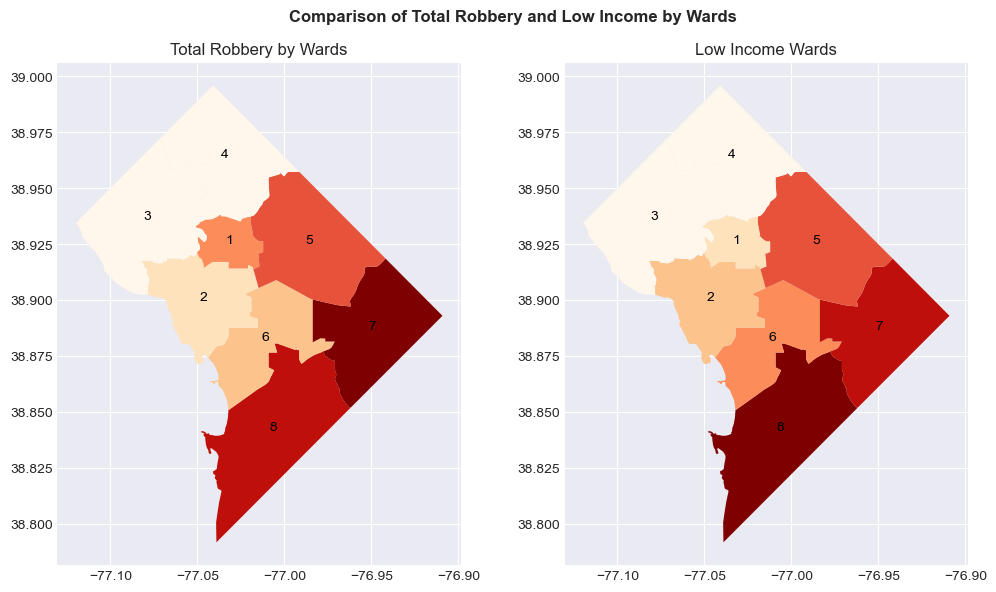

In [97]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Robbery and Low Income by Wards", fontsize=12, fontweight ="bold" )

RobViz.plot( column='robbery', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Robbery by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

In [98]:
AbuseViz = WARDGEO.merge(dc_crime_ward_abuse, left_on='WARD', right_on='WARD')
AbuseViz.head()

,WARD,geometry,centroid,sex abuse
0,8,"POLYGON ((-76.99392 38.87771, -76.99368 38.877...",POINT (-77.00631 38.84167),93
1,6,"POLYGON ((-77.00908 38.87162, -77.00907 38.869...",POINT (-77.01080 38.88188),61
2,7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",POINT (-76.94942 38.88719),96
3,2,"POLYGON ((-77.03270 38.88262, -77.03352 38.881...",POINT (-77.04636 38.90004),55
4,1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",POINT (-77.03141 38.92552),50


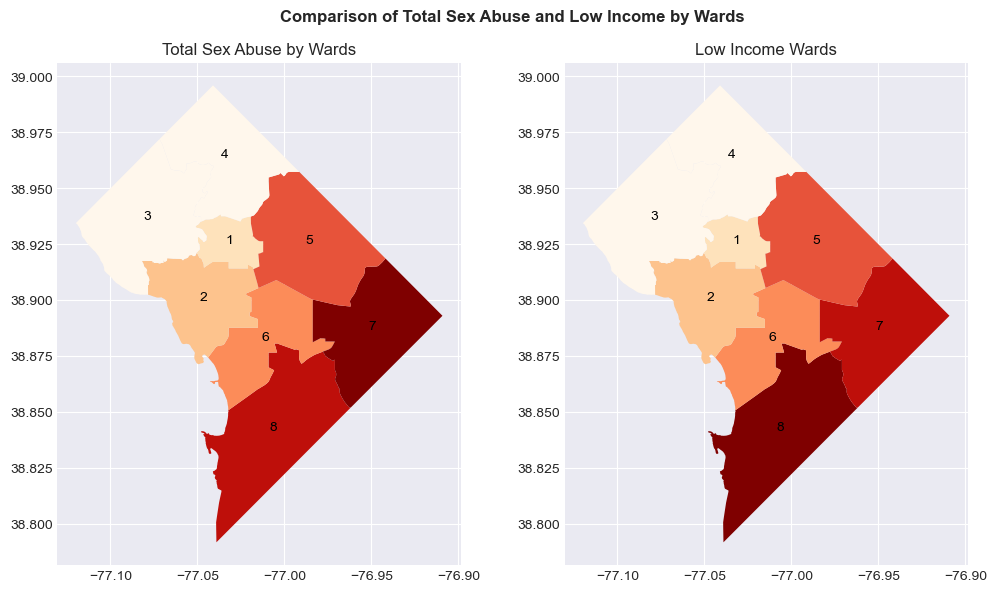

In [99]:
# works exactly with the same principle with the heatmap comparison above.
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle("Comparison of Total Sex Abuse and Low Income by Wards", fontsize=12, fontweight ="bold" )

AbuseViz.plot( column='sex abuse', k= 7, scheme= 'quantiles', cmap='OrRd', ax=axes[0])
Low_Income.plot( column='Total Low Income', k= 7, scheme= 'quantiles', cmap='OrRd',ax=axes[1])


axes[0].set_title('Total Sex Abuse by Wards')
axes[1].set_title('Low Income Wards')

for idx, row in High_Income.iterrows():
    axes[0].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')
    axes[1].annotate(text=row['WARD'], xy=(row['centroid'].x,row['centroid'].y),
                 horizontalalignment='center', color = 'k')

#### Comments on comparative heatmaps by Crime Type and Income Distribution:
These heatmaps illustrate how specific crime types distribution across wards correlates with wealth distribution across the same neighborhoods. Some correlations are pretty strong: for example, we can see that the heatmap looks very similar for the number of assaults and homicides with low-income dense wards. On the other hand, we cannot correlate theft numbers to low-income patterns. The main result is that there are only certain types of crimes that connect with low-income neighborhoods, and these crimes are assault, homicide, and robbery. These crimes seem more dangerous for citizens because guns or other weapons are more likely to be involved and create higher risks of hurting living creatures. 

This analysis explains the income disparity and segregation problem in DC much more clearer. The fact that certain crimes can be associated with income patterns or that some crimes are more likely to happen in low-income areas brings the question of equity. Do crime patterns (especially more dangerous crimes) contribute to inequality spatially? Or are they one of the results of segregation?

Finally, I will offer a different section that summarizes the correlation and the inverse correlation patterns of all crimes and low/high-income numbers by wards to each other.

### Correlation

In [100]:
# I lastly want to add the correlation table for all crime types and low and high income groups to all others.
# I merge 3 datasets on WARD column. I only keep all crime types and low and high income.
df = [dc_crime_ward_type, High_Income, Low_Income]
dc_crime_corr = reduce(lambda  left,right: pd.merge(left,right,on=['WARD'],
                                            how='outer'), df)
dc_crime_corr= dc_crime_corr[['theft','assault','car theft', 'burglary', 'homicide', 'motor theft', 'robbery', 'sex abuse', 
                              'Total High Income','Total Low Income']]
dc_crime_corr

,theft,assault,car theft,burglary,homicide,motor theft,robbery,sex abuse,Total High Income,Total Low Income
0,4614,378,3463,394,36,1259,808,50,19966,4512
1,7086,296,4219,725,25,1130,569,55,22449,4673
2,1992,74,1551,229,7,319,108,23,22893,3849
3,2528,253,2962,265,35,871,461,33,15287,4294
4,4354,798,4097,614,80,1535,952,77,13502,6497
5,4823,369,2926,420,33,1475,657,61,27844,6088
6,3151,1057,2674,427,163,1838,1247,96,6157,9475
7,2315,1267,1631,442,214,1270,976,93,5822,11625


In [101]:
# I compute the correlation table
corr = dc_crime_corr.corr()
corr

,theft,assault,car theft,burglary,homicide,motor theft,robbery,sex abuse,Total High Income,Total Low Income
theft,1.000000,-0.232719,0.828939,0.808361,-0.365430,0.322159,0.083664,0.045320,0.469339,-0.298958
assault,-0.232719,1.000000,-0.182771,0.263947,0.972013,0.675286,0.863925,0.943875,-0.858758,0.960646
car theft,0.828939,-0.182771,1.000000,0.724769,-0.363728,0.397278,0.199250,0.032805,0.243803,-0.372197
burglary,0.808361,0.263947,0.724769,1.000000,0.113126,0.499610,0.400078,0.463624,-0.025527,0.154300
homicide,-0.365430,0.972013,-0.363728,0.113126,1.000000,0.539844,0.767902,0.870882,-0.884888,0.979676
motor theft,0.322159,0.675286,0.397278,0.499610,0.539844,1.000000,0.924022,0.847682,-0.413946,0.580509
robbery,0.083664,0.863925,0.199250,0.400078,0.767902,0.924022,1.000000,0.930379,-0.697282,0.755132
sex abuse,0.045320,0.943875,0.032805,0.463624,0.870882,0.847682,0.930379,1.000000,-0.698942,0.898917
Total High Income,0.469339,-0.858758,0.243803,-0.025527,-0.884888,-0.413946,-0.697282,-0.698942,1.000000,-0.781601
Total Low Income,-0.298958,0.960646,-0.372197,0.154300,0.979676,0.580509,0.755132,0.898917,-0.781601,1.000000


<AxesSubplot: >

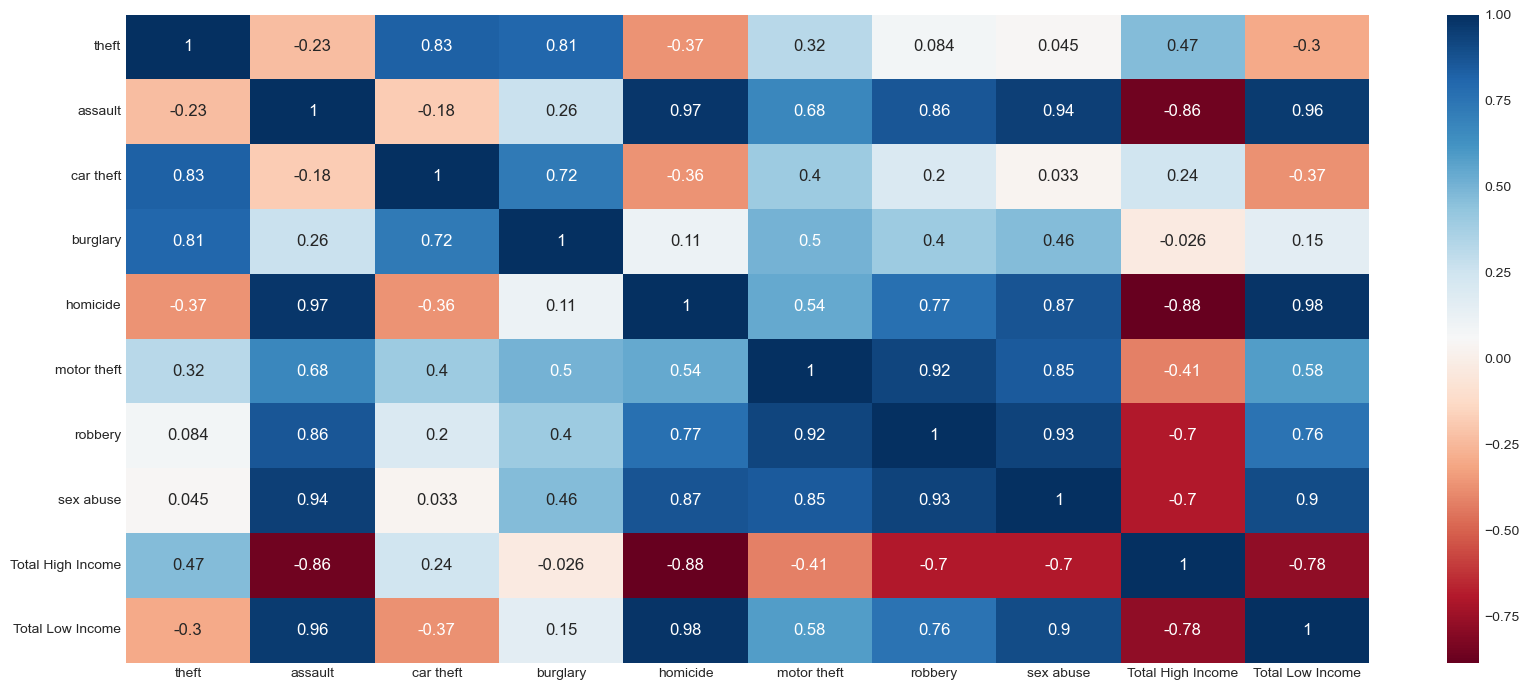

In [102]:
# I visualize the correlation table using seaborn heatmap. 
# Dark blue: strong correlation 
# Dark red: strong inverse correlation
# White hues: weak correlation
sns.heatmap(corr, cmap="RdBu", annot=True, annot_kws={"size":12})

#### Comment on correlation table of crime types and low and high income groups:
I encounter strong correlations in this table (0.98 between homicide and low income, 0.96 between assault and low income) like I predicted the patterns on the heatmaps. This strong correlation is a promising final result worth looking into in detail. The following steps in this project (after submission) will be about looking into assault and homicide patterns on a more spatial basis, mapping every crime and seeing crime density patterns, and mapping the streets that are more likely for these crimes to happen, including the most dangerous junctions and so on.

Another good detail is that I also see strong inverse correlations, such as -0.86 and -0.88, between high-income groups and homicide/assault. As I have not compared high-income groups with crime types, it is valuable to see this result because high and low-income neighborhoods are almost like discrete clusters regarding certain types of crimes. This fact is also a substantial consequence of exclusion and segregation by income, and most probably other factors that I did not specifically look into for this study, such as ethnic and racial differences. 